In [ ]:
!pip install openml pandas requests pydantic langchain tqdm retrying sentence_transformers ipywidgets rapidfuzz matplotlib numpy scikit-learn gensim seaborn faiss-cpu chardet langchain-core langchain-openai openai pymfe dask

In [47]:
import json
import os
import logging
import time
import random
import re
import gc
import shutil
import warnings
import requests
import chardet
import csv
import pickle
import joblib
from typing import Dict, List, Any, Callable, Set, Tuple, Optional, DefaultDict
from collections import defaultdict
from functools import lru_cache
from itertools import combinations

import pandas as pd
import numpy as np
import openml
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import torch
from tqdm import tqdm
from tenacity import retry, stop_after_attempt, wait_fixed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import HDBSCAN, KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, classification_report, 
    confusion_matrix, f1_score, accuracy_score, precision_score, 
    recall_score
)
from sklearn.model_selection import (
    KFold, train_test_split, StratifiedKFold, cross_val_predict, 
    cross_validate
)
from sklearn.preprocessing import (
    LabelEncoder, PowerTransformer, StandardScaler
)
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec, KeyedVectors
from pymfe.mfe import MFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ipywidgets as widgets
from IPython.display import display, clear_output
import faiss

warnings.filterwarnings('ignore')
os.environ["OMP_NUM_THREADS"] = "1"

# Baseline

## Embeddings of columns

Удален кэш-файл: baseline_embeddings_cache.pkl
Удален кэш-файл: classification_embeddings_cache.pkl
Удален кэш-файл: domain_embeddings_cache.pkl
Загрузка информации о датасетах...


2025-08-14 14:22:34,369 - INFO - Use pytorch device_name: cpu
2025-08-14 14:22:34,369 - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Всего папок в all_datasets: 258
Успешно загружено датасетов: 258
Уникальные домены:
Computer Science & Artificial Intelligence    41
Medical Science                               30
Engineering & Technology                      22
Sports & Recreation                           19
Social Sciences                               18
Finance & Economics                           17
Synthetic Systems                             16
Transportation Systems                        16
Environmental Science                         16
Computational Biology                         16
Biology & Genetics                            15
Physics & Mathematics                         14
Materials Science                             14
Veterinary Science                             4
Name: count, dtype: int64
Количество уникальных доменов: 14
Загружено 258 датасетов
Инициализация модели для создания эмбеддингов...
Создание эмбеддингов для метода голосование...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Подготовка данных для оценки метода голосование

Оценка метода голосование:
Несоответствия доменов (истинный vs. бейзлайн): 185 из 258
Примеры несоответствий:
Dataset 10: Истинный=Medical Science, Предсказанный (бейзлайн)=Computational Biology, Columns=lymphatics, block_of_affere, bl_of_lymph_c, bl_of_lymph_s, by_pass, extravasates, regeneration_of, early_uptake_in, lym_nodes_dimin, lym_nodes_enlar, changes_in_lym, defect_in_node, changes_in_node, changes_in_stru, special_forms, dislocation_of, exclusion_of_no, no_of_nodes_in, class
Dataset 11: Истинный=Synthetic Systems, Предсказанный (бейзлайн)=Medical Science, Columns=left-weight, left-distance, right-weight, right-distance, class
Dataset 1100: Истинный=Social Sciences, Предсказанный (бейзлайн)=Medical Science, Columns=Gender, Grade, Age, Race, Urban/Rural, School, Goals, Grades, Sports, Looks, Money
Dataset 115: Истинный=Computer Science & Artificial Intelligence, Предсказанный (бейзлайн)=Engineering & Technology, Columns=att1, at

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Подготовка данных для классификации

Распределение доменов:
Computer Science & Artificial Intelligence    41
Medical Science                               30
Engineering & Technology                      22
Sports & Recreation                           19
Social Sciences                               18
Finance & Economics                           17
Synthetic Systems                             16
Transportation Systems                        16
Environmental Science                         16
Computational Biology                         16
Biology & Genetics                            15
Physics & Mathematics                         14
Materials Science                             14
Veterinary Science                             4
Name: count, dtype: int64
Количество уникальных доменов: 14

Обучение моделей и кросс-валидация
Обучение и кросс-валидация модели: RandomForest
Accuracy: 0.61 ± 0.04
F1-Score (Macro): 0.54 ± 0.06
F1-Score (Weighted): 0.59 ± 0.04
Обучение и кросс-валидаци

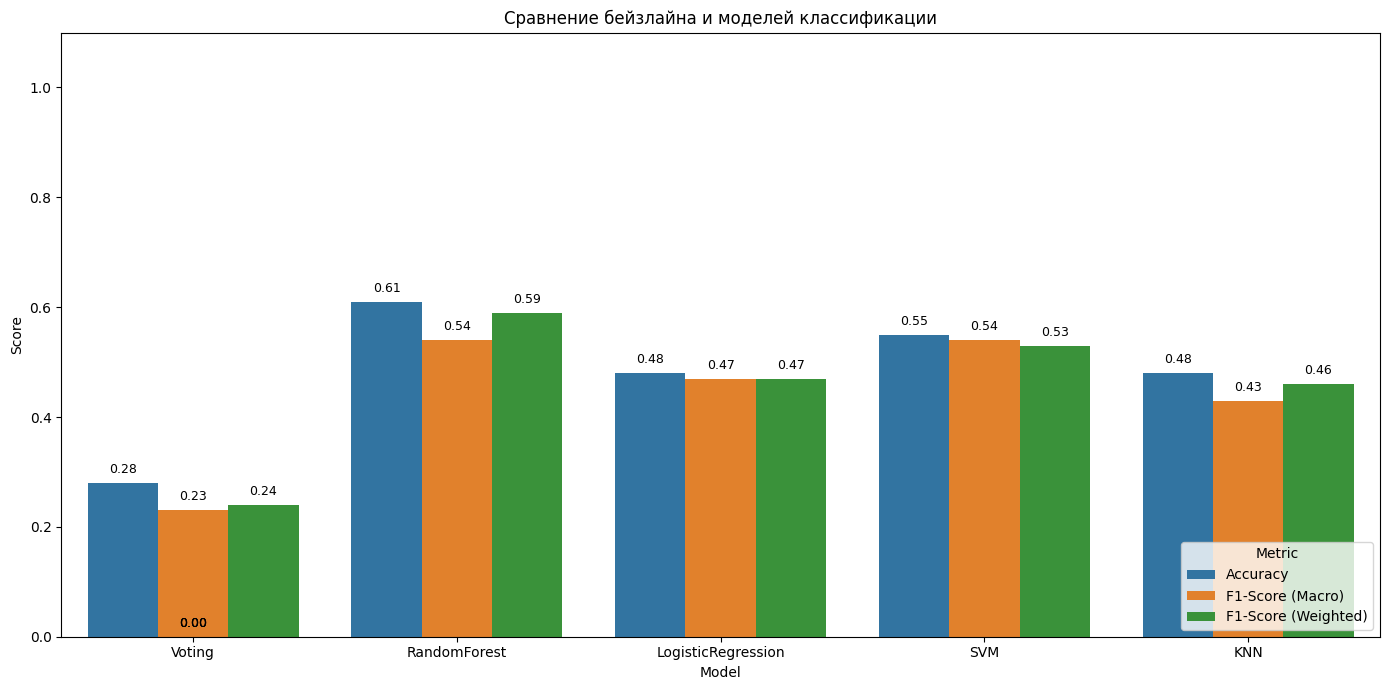


Лучшая модель: RandomForest
Лучшая модель сохранена как column_embedding_classifier.pkl

Найдено ошибок классификации (RandomForest): 101 из 258

Примеры ошибок классификации:

Dataset 10:
  Истинный домен: Medical Science
  Предсказанный домен (модель): Biology & Genetics
  Предсказанный домен (бейзлайн): Computational Biology
  Columns: lymphatics, block_of_affere, bl_of_lymph_c, bl_of_lymph_s, by_pass, extravasates, regeneration_of, early_uptake_in, lym_nodes_dimin, lym_nodes_enlar, changes_in_lym, defect_in_node, changes_in_node, changes_in_stru, special_forms, dislocation_of, exclusion_of_no, no_of_nodes_in, class

Dataset 11:
  Истинный домен: Synthetic Systems
  Предсказанный домен (модель): Transportation Systems
  Предсказанный домен (бейзлайн): Medical Science
  Columns: left-weight, left-distance, right-weight, right-distance, class

Dataset 1141:
  Истинный домен: Biology & Genetics
  Предсказанный домен (модель): Computer Science & Artificial Intelligence
  Предсказанный 

In [11]:
INPUT_DIR = "all_datasets"
MODEL_SAVE_PATH = "column_embedding_classifier.pkl"
OUTPUT_DIR = "results"
EMBEDDING_METHOD = "avg"  
N_SPLITS = 5 

def load_dataset_info():
    """Загрузка информации о датасетах и их доменов с отладкой"""
    dataset_info = {}
    skipped_datasets = []
    domains = []
    
    for dataset_id in os.listdir(INPUT_DIR):
        csv_path = os.path.join(INPUT_DIR, dataset_id, "random_rows.csv")
        meta_path = os.path.join(INPUT_DIR, dataset_id, "metadata.json")
        
        if not os.path.exists(csv_path):
            skipped_datasets.append((dataset_id, "No file random_rows.csv"))
            continue
        if not os.path.exists(meta_path):
            skipped_datasets.append((dataset_id, "No file metadata.json"))
            continue
            
        try:
            with open(meta_path, 'r') as f:
                metadata = json.load(f)
                domain = metadata.get('domain', 'Other')
                domains.append(domain)
        except Exception as e:
            skipped_datasets.append((dataset_id, f"Ошибка чтения metadata.json: {e}"))
            continue
        
        try:
            df = pd.read_csv(csv_path, nrows=0)
            columns = list(df.columns)
        except Exception as e:
            skipped_datasets.append((dataset_id, f"Ошибка чтения sample.csv: {e}"))
            continue
        
        dataset_info[dataset_id] = {
            'columns': columns,
            'domain': domain
        }
    
    print(f"Всего папок в {INPUT_DIR}: {len(os.listdir(INPUT_DIR))}")
    print(f"Успешно загружено датасетов: {len(dataset_info)}")
    if skipped_datasets:
        print("Пропущенные датасеты:")
        for ds_id, reason in skipped_datasets:
            print(f"  {ds_id}: {reason}")
    print("Уникальные домены:")
    domain_counts = pd.Series(domains).value_counts()
    print(domain_counts)
    print(f"Количество уникальных доменов: {len(domain_counts)}")
    
    return dataset_info, domains

def voting_baseline_predict(columns, embedding_model, domain_embeddings, unique_domains, max_columns=50):
    """
    Предсказывает домен датасета методом голосования на основе названий столбцов
    
    Параметры:
        columns (list): Список названий столбцов
        embedding_model: Модель для создания эмбеддингов
        domain_embeddings (np.array): Матрица эмбеддингов доменов
        unique_domains (list): Список уникальных доменов
        max_columns (int): Максимальное количество столбцов для обработки
        
    Возвращает:
        tuple: (feature_vector, predicted_domain)
    """
    # Ограничиваем число столбцов
    columns = columns[:max_columns]
    
    # Кодируем названия столбцов
    col_embeddings = embedding_model.encode(columns, batch_size=128)
    
    # Нормализация эмбеддингов для косинусного сходства
    col_embeddings = col_embeddings / np.linalg.norm(col_embeddings, axis=1, keepdims=True)
    domain_embeddings_norm = domain_embeddings / np.linalg.norm(domain_embeddings, axis=1, keepdims=True)
    
    # Создание FAISS индекса
    index = faiss.IndexFlatIP(domain_embeddings_norm.shape[1])
    index.add(domain_embeddings_norm)
    
    # Поиск ближайших доменов для каждого столбца
    _, indices = index.search(col_embeddings, 1)
    nearest_domains = [unique_domains[idx[0]] for idx in indices]
    
    # Подсчет голосов
    domain_counts = Counter(nearest_domains)
    feature_vector = np.array([domain_counts.get(d, 0) / len(columns) for d in unique_domains])
    most_common_domain = domain_counts.most_common(1)[0][0]
    
    return feature_vector, most_common_domain

def generate_embeddings(dataset_info, embedding_model, domains, method="avg", cache_file="embeddings_cache.pkl", max_columns=50):
    """Создание эмбеддингов датасета: усредненные или на основе долей доменов"""
    if os.path.exists(cache_file):
        print(f"Загрузка эмбеддингов из кэша: {cache_file}")
        with open(cache_file, 'rb') as f:
            return pickle.load(f), list(set(domains))
    
    unique_domains = list(set(domains))
    embeddings = {}
    
    if method == "voting":
        # Загрузка/создание эмбеддингов доменов
        domain_cache_file = "domain_embeddings_cache.pkl"
        if os.path.exists(domain_cache_file):
            with open(domain_cache_file, 'rb') as f:
                domain_embeddings = pickle.load(f)
        else:
            domain_embeddings = embedding_model.encode(unique_domains, batch_size=128)
            with open(domain_cache_file, 'wb') as f:
                pickle.dump(domain_embeddings, f)
    
    for ds_id, info in dataset_info.items():
        try:
            columns = info['columns']
            if method == "avg":
                # Обработка для усредненных эмбеддингов
                col_embeddings = embedding_model.encode(columns[:max_columns], batch_size=128)
                feature_vector = np.mean(col_embeddings, axis=0)
                embeddings[ds_id] = {
                    'embedding': feature_vector,
                    'predicted_domain': None,
                    'domain': info['domain']
                }
            elif method == "voting":
                # Используем новую функцию для voting
                feature_vector, most_common_domain = voting_baseline_predict(
                    columns=columns,
                    embedding_model=embedding_model,
                    domain_embeddings=domain_embeddings,
                    unique_domains=unique_domains,
                    max_columns=max_columns
                )
                embeddings[ds_id] = {
                    'embedding': feature_vector,
                    'predicted_domain': most_common_domain,
                    'domain': info['domain']
                }
        except Exception as e:
            print(f"Ошибка создания эмбеддинга для {ds_id}: {e}")
    
    with open(cache_file, 'wb') as f:
        pickle.dump(embeddings, f)
    return embeddings, unique_domains

def train_models(X, y):
    models = {
        'RandomForest': RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight='balanced'
        ),
        'LogisticRegression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced'
        ),
        'SVM': SVC(
            kernel='rbf',
            probability=True,
            random_state=42,
            class_weight='balanced'
        ),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }
    
    cv = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    
    results = {}
    for name, model in models.items():
        print(f"Обучение и кросс-валидация модели: {name}")
        
        acc_scores = []
        prec_macro_scores = []
        rec_macro_scores = []
        f1_macro_scores = []
        prec_weighted_scores = []
        rec_weighted_scores = []
        f1_weighted_scores = []
        
        y_pred_all = np.zeros_like(y)
        
        for train_idx, test_idx in cv.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            y_pred_all[test_idx] = y_pred
            
            acc_scores.append(accuracy_score(y_test, y_pred))
            prec_macro_scores.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
            rec_macro_scores.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
            f1_macro_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
            prec_weighted_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
            rec_weighted_scores.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
            f1_weighted_scores.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
        
        results[name] = {
            'model': model,
            'y_pred': y_pred_all,
            'metrics': {
                'Accuracy': {'mean': np.mean(acc_scores), 'std': np.std(acc_scores)},
                'Precision (Macro)': {'mean': np.mean(prec_macro_scores), 'std': np.std(prec_macro_scores)},
                'Recall (Macro)': {'mean': np.mean(rec_macro_scores), 'std': np.std(rec_macro_scores)},
                'F1-Score (Macro)': {'mean': np.mean(f1_macro_scores), 'std': np.std(f1_macro_scores)},
                'Precision (Weighted)': {'mean': np.mean(prec_weighted_scores), 'std': np.std(prec_weighted_scores)},
                'Recall (Weighted)': {'mean': np.mean(rec_weighted_scores), 'std': np.std(rec_weighted_scores)},
                'F1-Score (Weighted)': {'mean': np.mean(f1_weighted_scores), 'std': np.std(f1_weighted_scores)}
            }
        }
        
        print(f"Accuracy: {results[name]['metrics']['Accuracy']['mean']:.2f} ± {results[name]['metrics']['Accuracy']['std']:.2f}")
        print(f"F1-Score (Macro): {results[name]['metrics']['F1-Score (Macro)']['mean']:.2f} ± {results[name]['metrics']['F1-Score (Macro)']['std']:.2f}")
        print(f"F1-Score (Weighted): {results[name]['metrics']['F1-Score (Weighted)']['mean']:.2f} ± {results[name]['metrics']['F1-Score (Weighted)']['std']:.2f}")
    
    return models, results

def clear_cache():
    cache_files = [
        "baseline_embeddings_cache.pkl",
        "classification_embeddings_cache.pkl",
        "domain_embeddings_cache.pkl"
    ]
    for file in cache_files:
        if os.path.exists(file):
            os.remove(file)
            print(f"Удален кэш-файл: {file}")

def main():
    print("Загрузка информации о датасетах...")
    dataset_info, domains = load_dataset_info()
    print(f"Загружено {len(dataset_info)} датасетов")
    
    if not dataset_info:
        print("Не найдено датасетов для обработки")
        return
    
    print("Инициализация модели для создания эмбеддингов...")
    embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  
    
    # Создание эмбеддингов для метода голосование
    print("Создание эмбеддингов для метода голосование...")
    baseline_embeddings, unique_domains = generate_embeddings(
        dataset_info, 
        embedding_model, 
        domains, 
        method="voting", 
        cache_file="baseline_embeddings_cache.pkl"
    )
    
    if not baseline_embeddings:
        print("Не удалось создать эмбеддинги для метода голосование")
        return
    
    print("\nПодготовка данных для оценки метода голосование")
    dataset_ids = list(baseline_embeddings.keys())
    y_true = [data['domain'] for data in baseline_embeddings.values()]
    predicted_domains = [data['predicted_domain'] for data in baseline_embeddings.values()]
    
    print("\nОценка метода голосование:")
    mismatches = [(ds_id, true, pred) for ds_id, true, pred in zip(dataset_ids, y_true, predicted_domains) if true != pred]
    print(f"Несоответствия доменов (истинный vs. бейзлайн): {len(mismatches)} из {len(dataset_ids)}")
    if mismatches:
        print("Примеры несоответствий:")
        for ds_id, true, pred in mismatches[:min(5, len(mismatches))]:
            print(f"Dataset {ds_id}: Истинный={true}, Предсказанный (бейзлайн)={pred}, Columns={', '.join(dataset_info[ds_id]['columns'])}")
    
    # Расчет метрик для бейзлайна
    baseline_acc = accuracy_score(y_true, predicted_domains)
    baseline_prec_macro = precision_score(y_true, predicted_domains, average='macro', zero_division=0)
    baseline_rec_macro = recall_score(y_true, predicted_domains, average='macro', zero_division=0)
    baseline_f1_macro = f1_score(y_true, predicted_domains, average='macro', zero_division=0)
    baseline_prec_weighted = precision_score(y_true, predicted_domains, average='weighted', zero_division=0)
    baseline_rec_weighted = recall_score(y_true, predicted_domains, average='weighted', zero_division=0)
    baseline_f1_weighted = f1_score(y_true, predicted_domains, average='weighted', zero_division=0)
    
    print("\nМетрики бейзлайна:")
    print(f"Accuracy: {baseline_acc:.2f} ± 0.00")
    print(f"F1-Score (Macro): {baseline_f1_macro:.2f} ± 0.00")
    print(f"F1-Score (Weighted): {baseline_f1_weighted:.2f} ± 0.00")
    
    print("\nСоздание эмбеддингов для классификации...")
    classification_embeddings, _ = generate_embeddings(
        dataset_info, 
        embedding_model, 
        domains, 
        method=EMBEDDING_METHOD, 
        cache_file="classification_embeddings_cache.pkl"
    )
    
    if not classification_embeddings:
        print("Не удалось создать эмбеддинги для классификации")
        return
    
    print("Подготовка данных для классификации")
    X = np.array([data['embedding'] for data in classification_embeddings.values()])
    y_true = [data['domain'] for data in classification_embeddings.values()]
    dataset_ids = list(classification_embeddings.keys())
    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_true)
    
    print("\nРаспределение доменов:")
    domain_counts = pd.Series(y_true).value_counts()
    print(domain_counts)
    print(f"Количество уникальных доменов: {len(domain_counts)}")
    
    print("\nОбучение моделей и кросс-валидация")
    models, cv_results = train_models(X, y_encoded)
    
    print("\nСравнение бейзлайна и моделей:")
    comparison = []
    
    # Добавляем бейзлайн
    comparison.append({
        'Model': 'Voting',
        'Accuracy': f"{baseline_acc:.2f} ± 0.00",
        'Precision (Macro)': f"{baseline_prec_macro:.2f} ± 0.00",
        'Recall (Macro)': f"{baseline_rec_macro:.2f} ± 0.00",
        'F1-Score (Macro)': f"{baseline_f1_macro:.2f} ± 0.00",
        'Precision (Weighted)': f"{baseline_prec_weighted:.2f} ± 0.00",
        'Recall (Weighted)': f"{baseline_rec_weighted:.2f} ± 0.00",
        'F1-Score (Weighted)': f"{baseline_f1_weighted:.2f} ± 0.00"
    })

    for model_name, res in cv_results.items():
        metrics = res['metrics']
        comparison.append({
            'Model': model_name,
            'Accuracy': f"{metrics['Accuracy']['mean']:.2f} ± {metrics['Accuracy']['std']:.2f}",
            'Precision (Macro)': f"{metrics['Precision (Macro)']['mean']:.2f} ± {metrics['Precision (Macro)']['std']:.2f}",
            'Recall (Macro)': f"{metrics['Recall (Macro)']['mean']:.2f} ± {metrics['Recall (Macro)']['std']:.2f}",
            'F1-Score (Macro)': f"{metrics['F1-Score (Macro)']['mean']:.2f} ± {metrics['F1-Score (Macro)']['std']:.2f}",
            'Precision (Weighted)': f"{metrics['Precision (Weighted)']['mean']:.2f} ± {metrics['Precision (Weighted)']['std']:.2f}",
            'Recall (Weighted)': f"{metrics['Recall (Weighted)']['mean']:.2f} ± {metrics['Recall (Weighted)']['std']:.2f}",
            'F1-Score (Weighted)': f"{metrics['F1-Score (Weighted)']['mean']:.2f} ± {metrics['F1-Score (Weighted)']['std']:.2f}"
        })
    
    comparison_df = pd.DataFrame(comparison)
    print(comparison_df.to_string(index=False))

    plot_data = []
    for model in comparison_df['Model']:
        row = comparison_df[comparison_df['Model'] == model].iloc[0]
        plot_data.append({
            'Model': model,
            'Metric': 'Accuracy',
            'Value': float(row['Accuracy'].split(' ')[0])
        })
        plot_data.append({
            'Model': model,
            'Metric': 'F1-Score (Macro)',
            'Value': float(row['F1-Score (Macro)'].split(' ')[0])
        })
        plot_data.append({
            'Model': model,
            'Metric': 'F1-Score (Weighted)',
            'Value': float(row['F1-Score (Weighted)'].split(' ')[0])
        })
    
    plot_df = pd.DataFrame(plot_data)

    plt.figure(figsize=(14, 7))
    sns.barplot(data=plot_df, x='Model', y='Value', hue='Metric')
    plt.title('Сравнение бейзлайна и моделей классификации')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{height:.2f}', 
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom',
                          xytext=(0, 5),
                          textcoords='offset points',
                          fontsize=9)
    
    plt.legend(title='Metric', loc='lower right')
    plt.tight_layout()
    plt.savefig('comparison_metrics.png')
    plt.show()

    best_model_name = None
    best_accuracy = 0.0
    
    for model_name, res in cv_results.items():
        if res['metrics']['Accuracy']['mean'] > best_accuracy:
            best_accuracy = res['metrics']['Accuracy']['mean']
            best_model_name = model_name
    
    if best_accuracy <= baseline_acc:
        best_model_name = 'Voting'
    
    print(f"\nЛучшая модель: {best_model_name}")
    
    if best_model_name != 'Voting':
        best_model = cv_results[best_model_name]['model']
        best_model.fit(X, y_encoded)  
        joblib.dump({
            'model': best_model,
            'label_encoder': label_encoder,
            'embedding_model': embedding_model,
            'class_names': label_encoder.classes_
        }, MODEL_SAVE_PATH)
        print(f"Лучшая модель сохранена как {MODEL_SAVE_PATH}")

    if best_model_name != 'Voting':
        y_pred = cv_results[best_model_name]['y_pred']
        y_pred_domain = label_encoder.inverse_transform(y_pred)
        errors = []
        for i, ds_id in enumerate(dataset_ids):
            if y_true[i] != y_pred_domain[i]:
                errors.append({
                    'dataset_id': ds_id,
                    'columns': dataset_info[ds_id]['columns'],
                    'actual_domain': y_true[i],
                    'predicted_domain': y_pred_domain[i],
                    'predicted_domain_baseline': predicted_domains[i]
                })
        
        print(f"\nНайдено ошибок классификации ({best_model_name}): {len(errors)} из {len(dataset_ids)}")
        if errors:
            print("\nПримеры ошибок классификации:")
            for error in errors[:min(5, len(errors))]:
                print(f"\nDataset {error['dataset_id']}:")
                print(f"  Истинный домен: {error['actual_domain']}")
                print(f"  Предсказанный домен (модель): {error['predicted_domain']}")
                print(f"  Предсказанный домен (бейзлайн): {error['predicted_domain_baseline']}")
                print(f"  Columns: {', '.join(error['columns'])}")
    
    print("\nСохранение результатов...")
    all_results = []
    for i, ds_id in enumerate(dataset_ids):
        result_row = {
            'dataset_id': ds_id,
            'actual_domain': y_true[i],
            'predicted_domain_baseline': predicted_domains[i],
            'correct_baseline': int(y_true[i] == predicted_domains[i]),
            'columns': ', '.join(dataset_info[ds_id]['columns'])
        }
        for model_name in models.keys():
            y_pred_domain = label_encoder.inverse_transform(cv_results[model_name]['y_pred'])
            result_row[f'predicted_{model_name}'] = y_pred_domain[i]
            result_row[f'correct_{model_name}'] = int(y_true[i] == y_pred_domain[i])
        all_results.append(result_row)
    
    results_df = pd.DataFrame(all_results)
    results_df.to_csv('classification_results.csv', index=False)
    comparison_df.to_csv('comparison_metrics.csv', index=False)
    
    print("Результаты классификации и бейзлайна сохранены в classification_results.csv")
    print("Метрики сохранены в comparison_metrics.csv")

if __name__ == "__main__":
    clear_cache()
    main()

## D4

In [13]:
OUTPUT_DIR = "all_datasets"
TAG_FILE = "unique_tags.json"

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('dataset_processing.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

# Основные функции D4 
def compute_eqs(term_to_cols):
    eq_dict = defaultdict(list)
    for term, cols in term_to_cols.items():
        key = tuple(sorted(cols))
        eq_dict[key].append(term)
    eqs = list(eq_dict.values())
    term_to_eq = {term: i for i, eq in enumerate(eqs) for term in eq}
    return eqs, term_to_eq

def columns_to_eq(columns, eqs, term_to_eq):
    eq_columns = []
    for col in columns:
        eq_col = set(term_to_eq.get(term, -1) for term in col if term in term_to_eq)
        if -1 not in eq_col:
            eq_columns.append(eq_col)
    return eq_columns

def eq_to_terms(eq_set, eqs):
    terms = set()
    for e in eq_set:
        terms.update(eqs[e])
    return terms

def jaccard_eq(e1, e2, eq_to_cols):
    c1 = eq_to_cols.get(e1, set())
    c2 = eq_to_cols.get(e2, set())
    inter = len(c1 & c2)
    union = len(c1 | c2)
    return inter / union if union > 0 else 0.0

def context_signature_eq(e, all_eqs, eq_to_cols):
    sig = [(e2, jaccard_eq(e, e2, eq_to_cols)) for e2 in all_eqs if e2 != e and jaccard_eq(e, e2, eq_to_cols) > 0]
    sig.sort(key=lambda x: -x[1])
    return sig

def drop_index(sim_vec, start):
    if len(sim_vec) <= start + 1:
        return len(sim_vec)
    max_diff = -1
    drop_idx = start
    for i in range(start, len(sim_vec) - 1):
        diff = sim_vec[i] - sim_vec[i + 1]
        if diff > max_diff:
            max_diff = diff
            drop_idx = i + 1
    return drop_idx

def signature_blocks_eq(e, all_eqs, eq_to_cols):
    sig = context_signature_eq(e, all_eqs, eq_to_cols)
    if not sig:
        return []
    terms, sims = zip(*sig) if sig else ([], [])
    blocks = []
    start = 0
    while start < len(sims):
        drop = drop_index(sims, start)
        block = set(terms[start:drop])
        blocks.append(block)
        start = drop
    return blocks

def liberal_blocks(blocks):
    if not blocks:
        return []
    sizes = [len(b) for b in blocks]
    max_idx = np.argmax(sizes)
    return blocks[:max_idx]

def prune_centrist_eq(e, C_eq, blocks):
    x = [(set(), 0.0)]
    lib_blocks = liberal_blocks(blocks)
    for B in lib_blocks:
        inter = len(B & C_eq)
        rel = inter / len(B) if len(B) > 0 else 0.0
        x.append((B, rel))
    x.sort(key=lambda y: -y[1])
    rel_vec = [rel for _, rel in x]
    drop = drop_index(rel_vec, 1)
    robust = set()
    for i in range(1, drop):
        robust.update(x[i][0])
    return robust

def prune_conservative_eq(blocks):
    return blocks[0] if blocks else set()

def column_expand(C_eq, tau_sup, delta_dec, all_eqs, eq_to_cols, eqs, pruning_strategy='conservative'):
    C_plus = C_eq.copy()
    tau_col = tau_sup
    while tau_col > 0:
        C_prime = set()
        if pruning_strategy == 'conservative':
            robsigs = {t: prune_conservative_eq(signature_blocks_eq(t, all_eqs, eq_to_cols)) for t in C_plus}
        else:
            robsigs = {t: prune_centrist_eq(t, C_plus, signature_blocks_eq(t, all_eqs, eq_to_cols)) for t in C_plus}
        candidates = set()
        for robsig in robsigs.values():
            candidates.update(robsig)
        candidates -= C_plus
        for t_prime in candidates:
            S = set(t for t in C_plus if t_prime in robsigs[t])
            if len(S) / len(C_plus) > tau_sup and len(S & C_eq) / len(C_eq) > tau_col:
                C_prime.add(t_prime)
        if C_prime:
            C_plus.update(C_prime)
            tau_col -= delta_dec
        else:
            break
    return C_plus

def local_domains(C_plus, all_eqs, eq_to_cols, eqs, pruning_strategy='conservative'):
    G = nx.Graph()
    G.add_nodes_from(C_plus)
    for t1, t2 in combinations(C_plus, 2):
        if pruning_strategy == 'conservative':
            robsig1 = prune_conservative_eq(signature_blocks_eq(t1, all_eqs, eq_to_cols))
            robsig2 = prune_conservative_eq(signature_blocks_eq(t2, all_eqs, eq_to_cols))
        else:
            robsig1 = prune_centrist_eq(t1, C_plus, signature_blocks_eq(t1, all_eqs, eq_to_cols))
            robsig2 = prune_centrist_eq(t2, C_plus, signature_blocks_eq(t2, all_eqs, eq_to_cols))
        if t2 in robsig1 or t1 in robsig2:
            G.add_edge(t1, t2)
    components = list(nx.connected_components(G))
    local = [set(comp) for comp in components if len(comp) > 1]
    return local

def jaccard_sets(s1, s2):
    inter = len(s1 & s2)
    union = len(s1 | s2)
    return inter / union if union > 0 else 0.0

def domain_support(L, tau, all_local_domains):
    support = 0
    for other_locals in all_local_domains:
        for other_L in other_locals:
            if jaccard_sets(L, other_L) > tau:
                support += 1
                break
    return support

def strong_domains(all_local_domains, tau_dsim, tau_est, tau_strong):
    strong = []
    for locals in all_local_domains:
        for L in locals:
            sup_dsim = domain_support(L, tau_dsim, all_local_domains)
            sup_est = domain_support(L, tau_est, all_local_domains)
            if sup_est > 0 and sup_dsim / sup_est > tau_strong:
                strong.append(L)
    return strong

def generate_domain_terms(domain_representative_datasets, pruning_strategy='conservative', use_column_expansion=True, tau_dsim=0.3, tau_est=0.05, tau_strong=0.1):
    all_columns = []
    for dataset in tqdm(domain_representative_datasets, desc="Processing datasets for domain terms"):
        all_columns.extend(dataset)
    
    if not all_columns:
        return set()
    
    term_to_cols = defaultdict(set)
    for i, col in enumerate(all_columns):
        for term in col:
            term_to_cols[term].add(i)
    
    eqs, term_to_eq = compute_eqs(term_to_cols)
    if not eqs:
        all_terms = set()
        for col in all_columns:
            all_terms.update(col)
        return all_terms
    
    eq_columns = columns_to_eq(all_columns, eqs, term_to_eq)
    eq_to_cols = defaultdict(set)
    for term, cols in term_to_cols.items():
        eq_idx = term_to_eq[term]
        eq_to_cols[eq_idx].update(cols)
    
    all_eqs = list(range(len(eqs)))
    all_local_domains = []
    for C_eq in tqdm(eq_columns, desc="Computing local domains"):
        if use_column_expansion:
            C_plus = column_expand(C_eq, tau_sup=0.25, delta_dec=0.05, all_eqs=all_eqs, eq_to_cols=eq_to_cols, eqs=eqs, pruning_strategy=pruning_strategy)
        else:
            C_plus = C_eq
        local = local_domains(C_plus, all_eqs, eq_to_cols, eqs, pruning_strategy=pruning_strategy)
        all_local_domains.append(local)
    
    strong = strong_domains(all_local_domains, tau_dsim, tau_est, tau_strong)
    
    if not strong:
        all_terms = set()
        for col in all_columns:
            all_terms.update(col)
        return all_terms
    
    strong_terms = [eq_to_terms(L, eqs) for L in strong]
    
    domain_terms = set()
    for dom in strong_terms:
        domain_terms.update(dom)
    
    return domain_terms

def filter_common_terms(domain_terms_dict, min_domain_freq=0.8):
    """Фильтрация терминов, которые встречаются в большинстве доменов"""
    term_counts = defaultdict(int)
    total_domains = len(domain_terms_dict)
    
    for domain, terms in domain_terms_dict.items():
        for term in terms:
            term_counts[term] += 1
    
    common_terms = {term for term, count in term_counts.items() if count / total_domains >= min_domain_freq}
    
    filtered_dict = {}
    for domain, terms in domain_terms_dict.items():
        filtered_dict[domain] = terms - common_terms
    
    return filtered_dict

def generate_multi_domain_terms(domains_representative):
    domain_terms_dict = {}
    for domain, reps in tqdm(domains_representative.items(), desc="Generating domain terms"):
        domain_terms = generate_domain_terms(reps)
        domain_terms_dict[domain] = domain_terms
    return filter_common_terms(domain_terms_dict)

def compute_similarity(dataset_columns, domain_terms):
    extracted_terms = set()
    for col in dataset_columns:
        extracted_terms.update(col)
    
    matched_terms = extracted_terms.intersection(domain_terms)
    sim_score = len(matched_terms) / min(len(extracted_terms), len(domain_terms)) if min(len(extracted_terms), len(domain_terms)) > 0 else 0.0
    return sim_score

def classify_dataset(dataset_columns, domain_terms_dict):
    scores = {}
    max_score = -1
    predicted_domain = None
    for domain, terms in domain_terms_dict.items():
        score = compute_similarity(dataset_columns, terms)
        scores[domain] = score
        if score > max_score:
            max_score = score
            predicted_domain = domain
    return predicted_domain, scores

def bootstrap_metrics(true_labels, pred_labels, n_iterations=1000):
    n_samples = len(true_labels)
    if n_samples == 0:
        return {key: 0.0 for key in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted']}
    
    accuracies = []
    precisions_macro = []
    recalls_macro = []
    f1s_macro = []
    precisions_weighted = []
    recalls_weighted = []
    f1s_weighted = []
    
    for _ in range(n_iterations):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        boot_true = [true_labels[i] for i in indices]
        boot_pred = [pred_labels[i] for i in indices]
        
        accuracies.append(accuracy_score(boot_true, boot_pred))
        precisions_macro.append(precision_score(boot_true, boot_pred, average='macro', zero_division=0))
        recalls_macro.append(recall_score(boot_true, boot_pred, average='macro', zero_division=0))
        f1s_macro.append(f1_score(boot_true, boot_pred, average='macro', zero_division=0))
        precisions_weighted.append(precision_score(boot_true, boot_pred, average='weighted', zero_division=0))
        recalls_weighted.append(recall_score(boot_true, boot_pred, average='weighted', zero_division=0))
        f1s_weighted.append(f1_score(boot_true, boot_pred, average='weighted', zero_division=0))
    
    return {
        'accuracy': np.std(accuracies),
        'precision_macro': np.std(precisions_macro),
        'recall_macro': np.std(recalls_macro),
        'f1_macro': np.std(f1s_macro),
        'precision_weighted': np.std(precisions_weighted),
        'recall_weighted': np.std(recalls_weighted),
        'f1_weighted': np.std(f1s_weighted)
    }

def compute_classification_metrics(true_labels, pred_labels, unique_labels):
    accuracy = accuracy_score(true_labels, pred_labels)
    precision_macro = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall_macro = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1_macro = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    precision_weighted = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
    recall_weighted = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
    f1_weighted = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)
    
    return {
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted
    }

def plot_confusion_matrix(cm, unique_labels, output_path="confusion_matrix.png"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()
    logger.info(f"Матрица ошибок сохранена в {output_path}")

def save_results(metrics_data, predictions, output_path="classification_results.csv"):
    results_df = pd.DataFrame(metrics_data)
    predictions_df = pd.DataFrame(predictions, columns=["Dataset", "True Domain", "Predicted Domain", "Scores"])
    with open(output_path, 'w') as f:
        f.write("=== Метрики качества ===\n")
        results_df.to_csv(f, index=False)
        f.write("\n=== Предсказания ===\n")
        predictions_df.to_csv(f, index=False)
    logger.info(f"Результаты сохранены в {output_path}")

def discretize_numeric_column(column, bins=10):
    """Дискретизация числового столбца в строковые категории."""
    try:
        valid_data = pd.to_numeric(column.dropna(), errors='coerce')
        if valid_data.empty:
            return set()
        
        min_val, max_val = valid_data.min(), valid_data.max()
        if min_val == max_val:
            return {str(min_val)}

        bin_edges = pd.qcut(valid_data, q=bins, duplicates='drop').cat.categories
        if len(bin_edges) < 2:
            return {str(min_val)}
        
        labels = [f"{bin_edges[i].left:.2f}-{bin_edges[i].right:.2f}" for i in range(len(bin_edges))]
        discretized = pd.cut(valid_data, bins=bin_edges, labels=labels, include_lowest=True, ordered=False)
        return set(discretized.dropna().astype(str))
    except Exception as e:
        logger.warning(f"Ошибка дискретизации столбца: {str(e)}")
        return set()


def load_datasets_as_columns():
    dataset_columns = []
    unique_domains = set()
    
    subdirs = [d for d in os.listdir(OUTPUT_DIR) if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    for subdir in tqdm(subdirs, desc="Loading datasets"):
        try:
            dataset_id = int(subdir)
            metadata_path = os.path.join(OUTPUT_DIR, subdir, "metadata.json")
            csv_path = os.path.join(OUTPUT_DIR, subdir, "random_rows.csv")
            
            if not os.path.exists(metadata_path) or not os.path.exists(csv_path):
                logger.warning(f"Пропущен {subdir}: отсутствует metadata.json или random_rows.csv")
                continue
            
            with open(metadata_path, 'r') as f:
                metadata = json.load(f)
            
            domain = metadata.get('domain', None)
            if not domain:
                logger.warning(f"Домен отсутствует в {subdir}")
                continue
            
            data = pd.read_csv(csv_path)
            columns_sets = []
            for col in data.columns:
                if data[col].dtype == 'object':
                    unique_vals = set(data[col].dropna().astype(str))
                    if unique_vals:
                        columns_sets.append(unique_vals)
                else:
                    unique_vals = discretize_numeric_column(data[col])
                    if unique_vals:
                        columns_sets.append(unique_vals)
            
            if columns_sets:
                dataset_columns.append((dataset_id, columns_sets, domain))
                unique_domains.add(domain)
        
        except Exception as e:
            logger.error(f"Ошибка загрузки {subdir}: {str(e)}")
            continue
    
    return dataset_columns, unique_domains

def stratified_train_test_split(dataset_columns, test_size=0.2):
    domain_groups = defaultdict(list)
    for ds_id, cols, dom in dataset_columns:
        domain_groups[dom].append((ds_id, cols, dom))
    
    train_data = []
    test_data = []
    
    for dom, group in domain_groups.items():
        random.shuffle(group)
        n = len(group)
        n_test = max(1, int(n * test_size)) if n > 1 else 0
        n_train = n - n_test
        
        if n_train == 0 and n > 0:
            n_train = 1
            n_test = 0
        
        train_data.extend(group[:n_train])
        test_data.extend(group[n_train:])
    
    return train_data, test_data

def evaluate_classification(test_datasets, domain_terms_dict):
    true_labels = []
    pred_labels = []
    predictions = []
    for name, columns, true_domain in tqdm(test_datasets, desc="Classifying datasets"):
        pred_domain, scores = classify_dataset(columns, domain_terms_dict)
        true_labels.append(true_domain)
        pred_labels.append(pred_domain)
        predictions.append((name, true_domain, pred_domain, scores))
    
    unique_labels = list(set(true_labels + pred_labels))
    results = compute_classification_metrics(true_labels, pred_labels, unique_labels)
    cm = confusion_matrix(true_labels, pred_labels, labels=unique_labels)
    std_metrics = bootstrap_metrics(true_labels, pred_labels)
    
    return results, cm, unique_labels, predictions, std_metrics

def main():
    # Загрузка датасетов
    dataset_columns, unique_domains = load_datasets_as_columns()
    
    if not dataset_columns:
        logger.error("Нет подходящих датасетов для обработки!")
        return
    
    logger.info(f"Загружено датасетов: {len(dataset_columns)}")
    logger.info(f"Уникальных доменов: {len(unique_domains)}")
    
    # Стратифицированное разбиение
    train_data, test_data = stratified_train_test_split(dataset_columns)
    
    logger.info(f"Train датасетов: {len(train_data)}")
    logger.info(f"Test датасетов: {len(test_data)}")
    
    domains_representative_train = defaultdict(list)
    for _, cols, dom in train_data:
        domains_representative_train[dom].append(cols)
    
    # Генерация domain terms
    domain_terms_dict = generate_multi_domain_terms(domains_representative_train)
    
    print("Domain Terms Dict:")
    for domain, terms in domain_terms_dict.items():
        print(f"{domain}: {sorted(terms)[:10]}...")  
    
    test_datasets = [(f"Dataset_{ds_id}", cols, dom) for ds_id, cols, dom in test_data]
    
    results, cm, unique_labels, predictions, std_metrics = evaluate_classification(test_datasets, domain_terms_dict)
    
    print("\n=== Метрики качества ===")
    metrics_data = [
        {'Metric': 'Accuracy', 'Value': f"{results['accuracy']:.4f} ± {std_metrics['accuracy']:.4f}"},
        {'Metric': 'Precision (Macro)', 'Value': f"{results['precision_macro']:.4f} ± {std_metrics['precision_macro']:.4f}"},
        {'Metric': 'Recall (Macro)', 'Value': f"{results['recall_macro']:.4f} ± {std_metrics['recall_macro']:.4f}"},
        {'Metric': 'F1-Score (Macro)', 'Value': f"{results['f1_macro']:.4f} ± {std_metrics['f1_macro']:.4f}"},
        {'Metric': 'Precision (Weighted)', 'Value': f"{results['precision_weighted']:.4f} ± {std_metrics['precision_weighted']:.4f}"},
        {'Metric': 'Recall (Weighted)', 'Value': f"{results['recall_weighted']:.4f} ± {std_metrics['recall_weighted']:.4f}"},
        {'Metric': 'F1-Score (Weighted)', 'Value': f"{results['f1_weighted']:.4f} ± {std_metrics['f1_weighted']:.4f}"}
    ]
    for metric in metrics_data:
        print(f"{metric['Metric']}: {metric['Value']}")
    
    print("\nConfusion Matrix:\n", cm)
    print("Unique Labels:", unique_labels)
    print("\nPredictions:")
    for name, true, pred, scores in predictions:
        print(f"{name}: True={true}, Pred={pred}, Scores={scores}")

    plot_confusion_matrix(cm, unique_labels)
    save_results(metrics_data, predictions)

if __name__ == "__main__":
    main()

Loading datasets: 100%|██████████████████████████████████████████████████████████████| 258/258 [00:08<00:00, 29.51it/s]
2025-08-21 12:47:38,451 - INFO - Загружено датасетов: 258
2025-08-21 12:47:38,451 - INFO - Уникальных доменов: 14
2025-08-21 12:47:38,452 - INFO - Train датасетов: 211
2025-08-21 12:47:38,452 - INFO - Test датасетов: 47
Processing datasets for domain terms: 100%|████████████████████████████████████████████████████| 24/24 [00:00<?, ?it/s]

Processing datasets for domain terms: 100%|████████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]

Processing datasets for domain terms: 100%|████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]

Processing datasets for domain terms: 100%|████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]

Processing datasets for domain terms: 100%|█████████████████████████████████████████| 33/33 [00:00<00:00, 33057.57it/s]

Processing datasets for domain terms: 100%|████████████

Domain Terms Dict:
Medical Science: ["'B1of3'", "'B2of3'", "'B3of3'", '(-0.001, 0.2]', '(-0.001, 0.4]', '(-0.001, 0.8]', '(-0.001, 4.8]', '(-0.001, 9.6]', '(0.6, 1.0]', '(0.8, 1.0]']...
Social Sciences: ['(-0.001, 0.2]', '(-0.001, 0.4]', '(-0.001, 0.6]', '(-0.001, 0.8]', '(-0.001, 1620.0]', '(-0.001, 4.4]', '(-0.001, 50.0]', '(0.6, 1.0]', '(0.8, 1.0]', '(0.8, 1.2]']...
Synthetic Systems: ['(-0.001, 0.2]', '(-0.001, 0.4]', '(-0.0855, -0.00226]', '(-0.157, 0.0298]', '(-0.2, 0.0]', '(-0.2, 0.2]', '(-0.216, -0.0555]', '(-0.216, -0.15]', '(-0.392, -0.0602]', '(-0.4, 0.0]']...
Biology & Genetics: ['(-0.001, 0.2]', '(-0.001, 0.4]', '(-0.001, 0.8]', '(0.6, 1.0]', '(0.8, 1.0]', '(0.8, 1.2]', '(0.999, 1.2]', '(0.999, 1.4]', '(0.999, 1.8]', '(1.2, 2.0]']...
Computer Science & Artificial Intelligence: ["'B1of3'", "'B2of3'", "'B3of3'", '(-0.001, 0.108]', '(-0.001, 0.286]', '(-0.001, 0.2]', '(-0.001, 0.4]', '(-0.001, 0.6]', '(-0.001, 0.8]', '(-0.001, 1.0]']...
Engineering & Technology: ["'B1of3'", "

Classifying datasets: 100%|██████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 7834.84it/s]



=== Метрики качества ===
Accuracy: 0.2979 ± 0.0672
Precision (Macro): 0.4390 ± 0.0810
Recall (Macro): 0.2530 ± 0.0578
F1-Score (Macro): 0.2739 ± 0.0590
Precision (Weighted): 0.5257 ± 0.1260
Recall (Weighted): 0.2979 ± 0.0672
F1-Score (Weighted): 0.3035 ± 0.0726

Confusion Matrix:
 [[0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [0 1 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 2 0 2 1 1 1]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0]]
Unique Labels: ['Transportation Systems', 'Finance & Economics', 'Synthetic Systems', 'Social Sciences', 'Engineering & Technology', 'Veterinary Science', 'Environmental Science', 'Materials Science', 'Medical Science', 'Sports & Recreation', 'Computational Biology', 'Computer Scie

2025-08-21 12:48:07,400 - INFO - Матрица ошибок сохранена в confusion_matrix.png
2025-08-21 12:48:07,406 - INFO - Результаты сохранены в classification_results.csv


## Classification based on metafeatures

In [17]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "meta_features_results"
MODEL_SAVE_PATH = "domain_classifier.pkl"

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('domain_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)


def anova_feature_selection(X, y, k=10):
    """Отбор мета-характеристик с помощью ANOVA F-test"""
    if len(np.unique(y)) < 2:
        logger.warning("ANOVA F-test требует как минимум 2 класса, возвращаем все признаки")
        return X.columns.tolist(), np.ones(X.shape[1]), None
    
    f_scores, p_values = f_classif(X, y)
    
    sorted_indices = np.argsort(f_scores)[::-1]

    selected_indices = sorted_indices[:min(k, len(sorted_indices))]
    selected_columns = X.columns[selected_indices].tolist()
    
    logger.info(f"Отобрано {len(selected_columns)} мета-признаков из {X.shape[1]} с помощью ANOVA F-test")
    return selected_columns, f_scores, None

def preprocess_features(X):
    threshold = 0.5
    X = X.loc[:, X.isna().mean() < threshold]
    logger.info(f"После удаления столбцов с пропусками (>50%): {X.shape[1]} признаков")

    X = X.loc[:, X.nunique() > 1]
    logger.info(f"После удаления констант: {X.shape[1]} признаков")

    X = X.loc[:, ~X.T.duplicated()]
    logger.info(f"После удаления дубликатов: {X.shape[1]} признаков")

    # VIF-фильтрация
    try:
        X_imputed = SimpleImputer(strategy='median').fit_transform(X)
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X_imputed, i) for i in range(X_imputed.shape[1])]
        selected_features = vif_data[vif_data["VIF"] < 10]["feature"]
        X = X[selected_features]
        logger.info(f"После VIF-фильтрации (VIF < 10): {X.shape[1]} признаков")
    except Exception as e:
        logger.warning(f"Ошибка VIF-фильтрации: {str(e)}. Пропускаем VIF.")
    
    return X


def extract_meta_features():
    """Извлекает мета-характеристики для всех датасетов"""
    os.makedirs(RESULTS_DIR, exist_ok=True)
    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    all_features = []
    failed_datasets = []
    domains = []

    for dataset_id in tqdm(dataset_ids, desc="Извлечение мета-признаков"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            domain = metadata.get("domain")
            if not domain:
                logger.warning(f"Домен отсутствует для датасета {dataset_id}")
                continue
                
            data_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")
            if not os.path.exists(data_path):
                logger.warning(f"Файл random_rows.csv отсутствует для {dataset_id}")
                continue
                
            df = pd.read_csv(data_path)
            
            if df.empty:
                logger.warning(f"Пустой датасет: {dataset_id}")
                continue
            
            # Обработка пропущенных значений
            for col in df.columns:
                if pd.api.types.is_numeric_dtype(df[col]):
                    median_val = df[col].median()
                    if pd.isna(median_val):
                        median_val = 0
                    df[col].fillna(median_val, inplace=True)
                else:
                    mode_val = df[col].mode()
                    if not mode_val.empty:
                        df[col].fillna(mode_val[0], inplace=True)
                    else:
                        df[col].fillna('missing', inplace=True)
            
            numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
            categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
            
            groups = ["general", "statistical", "info-theory"]
            if numeric_cols:
                groups.append("model-based")
            
            mfe = MFE(
                groups=groups,
                summary=["mean", "sd"]
            )
            
            cat_features = {}
            if categorical_cols:
                try:
                    cat_df = df[categorical_cols].copy()
                    
                    for col in cat_df.columns:
                        le = LabelEncoder()
                        cat_df[col].fillna('missing', inplace=True)
                        try:
                            cat_df[col] = le.fit_transform(cat_df[col].astype(str))
                        except:
                            unique_vals = cat_df[col].unique()
                            mapping = {val: i for i, val in enumerate(unique_vals)}
                            cat_df[col] = cat_df[col].map(mapping)
                    
                    cat_mfe = MFE(groups=["general", "info-theory"])
                    cat_mfe.fit(cat_df.values)
                    cat_features_list = cat_mfe.extract()
                    cat_features = dict(zip(cat_features_list[0], cat_features_list[1]))
                except Exception as e:
                    logger.warning(f"Ошибка при обработке категориальных признаков для {dataset_id}: {str(e)}")
            
            num_features = {}
            if numeric_cols:
                try:
                    mfe.fit(df[numeric_cols].values)
                    num_features_list = mfe.extract()
                    num_features = dict(zip(num_features_list[0], num_features_list[1]))
                except Exception as e:
                    logger.warning(f"Ошибка при обработке числовых признаков для {dataset_id}: {str(e)}")
            
            features_dict = {**num_features, **cat_features}
            features_dict["dataset_id"] = dataset_id
            features_dict["domain"] = domain
            
            features_dict["num_numeric_cols"] = len(numeric_cols)
            features_dict["num_categorical_cols"] = len(categorical_cols)
            
            all_features.append(features_dict)
            domains.append(domain)
            
            del df
            gc.collect()
            
        except Exception as e:
            logger.error(f"Ошибка для {dataset_id}: {str(e)}")
            failed_datasets.append(dataset_id)
    
    if all_features:
        features_df = pd.DataFrame(all_features)
        features_df.to_csv(os.path.join(RESULTS_DIR, "meta_features_with_domains.csv"), index=False)
        logger.info(f"Мета-признаки сохранены в meta_features_with_domains.csv")
        
    logger.info(f"Успешно обработано: {len(all_features)} датасетов")
    logger.info(f"Ошибки обработки: {len(failed_datasets)} датасетов")
    
    domain_counts = pd.Series(domains).value_counts()
    logger.info("\nРаспределение доменов:")
    logger.info(domain_counts.to_string())
    
    return features_df

def train_domain_classifier(features_df):
    if features_df is None or features_df.empty:
        raise ValueError("Нет данных для обучения")
    
    X = features_df.drop(columns=["dataset_id", "domain"], errors="ignore")
    y = features_df["domain"]
    
    X = preprocess_features(X)
    
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    
    selected_columns, scores, _ = anova_feature_selection(X_imputed, y, k=15)  
    
    if not selected_columns:
        logger.warning("Нет отобранных мета-признаков! Используем все.")
        selected_columns = X_imputed.columns.tolist()
    else:
        X = X[selected_columns]
        logger.info(f"Используем отобранные мета-признаки: {selected_columns}")
    
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    class_names = le.classes_
    
    models = {
        'RandomForest': make_pipeline(
            SimpleImputer(strategy='median'),
            RandomForestClassifier(
                n_estimators=100, 
                random_state=42,
                class_weight='balanced',
                n_jobs=1
            )
        ),
        'LogisticRegression': make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            LogisticRegression(
                max_iter=1000,
                random_state=42,
                class_weight='balanced',
                n_jobs=1
            )
        ),
        'SVM': make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            SVC(
                kernel='rbf',
                probability=True,
                random_state=42,
                class_weight='balanced'
            )
        ),
        'KNN': make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler(),
            KNeighborsClassifier(n_neighbors=5)
        )
    }
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = {}
    
    logger.info("\nНачало кросс-валидации (StratifiedKFold)")
    for name, model in models.items():
        try:
            logger.info(f"Оценка модели: {name}")
            
            cv_results = cross_validate(
                model, X, y_encoded, cv=skf, n_jobs=1,
                scoring=['accuracy', 'f1_macro', 'f1_weighted', 'precision_macro', 'recall_macro'],
                return_train_score=False
            )
            
            y_pred = cross_val_predict(model, X, y_encoded, cv=skf, n_jobs=1)
            
            report = classification_report(
                y_encoded, y_pred, 
                target_names=class_names, 
                output_dict=True,
                zero_division=0
            )
            
            results[name] = {
                'model': model,
                'accuracy': cv_results['test_accuracy'].mean(),
                'accuracy_std': cv_results['test_accuracy'].std(),
                'precision_macro': cv_results['test_precision_macro'].mean(),
                'precision_macro_std': cv_results['test_precision_macro'].std(),
                'recall_macro': cv_results['test_recall_macro'].mean(),
                'recall_macro_std': cv_results['test_recall_macro'].std(),
                'f1_macro': cv_results['test_f1_macro'].mean(),
                'f1_macro_std': cv_results['test_f1_macro'].std(),
                'f1_weighted': cv_results['test_f1_weighted'].mean(),
                'f1_weighted_std': cv_results['test_f1_weighted'].std(),
                'report': report,
                'y_true': y_encoded,
                'y_pred': y_pred,
                'class_names': class_names,
                'cv_results': cv_results
            }

            logger.info(f"  Точность: {results[name]['accuracy']:.4f} ± {results[name]['accuracy_std']:.4f}")
            logger.info(f"  Precision: {results[name]['precision_macro']:.4f} ± {results[name]['precision_macro_std']:.4f}")
            logger.info(f"  Recall: {results[name]['recall_macro']:.4f} ± {results[name]['recall_macro_std']:.4f}")
            logger.info(f"  F1 (macro): {results[name]['f1_macro']:.4f} ± {results[name]['f1_macro_std']:.4f}")
            logger.info(f"  F1 (weighted): {results[name]['f1_weighted']:.4f} ± {results[name]['f1_weighted_std']:.4f}")
            
        except Exception as e:
            logger.error(f"Ошибка при оценке модели {name}: {str(e)}")
            results[name] = {
                'model': None,
                'accuracy': 0,
                'accuracy_std': 0,
                'f1_macro': 0,
                'f1_macro_std': 0,
                'f1_weighted': 0,
                'f1_weighted_std': 0,
                'report': {},
                'y_true': [],
                'y_pred': [],
                'class_names': []
            }
    
    successful_models = {k: v for k, v in results.items() if v['model'] is not None}
    
    if not successful_models:
        logger.error("Ни одна модель не была успешно обучена!")
        return results, None
    
    best_model_name = max(successful_models, key=lambda k: successful_models[k]['accuracy'])
    best_model = successful_models[best_model_name]
    
    logger.info(f"\nЛучшая модель: {best_model_name} с точностью {best_model['accuracy']:.4f} ± {best_model['accuracy_std']:.4f}")
    
    try:
        best_model_instance = best_model['model']
        best_model_instance.fit(X, y_encoded)
        
        joblib.dump({
            'model': best_model_instance,
            'label_encoder': le,
            'feature_names': X.columns.tolist(),
            'selected_features': selected_columns,
            'feature_scores': scores  
        }, os.path.join(RESULTS_DIR, MODEL_SAVE_PATH))
        
        logger.info(f"Лучшая модель сохранена в {MODEL_SAVE_PATH}")
        
        best_model['trained_model'] = best_model_instance
    except Exception as e:
        logger.error(f"Ошибка при обучении лучшей модели на всех данных: {str(e)}")
        best_model['trained_model'] = None
    
    save_results(results, features_df, RESULTS_DIR)
    
    return results, best_model

def save_results(results, features_df, output_dir):
    metrics = []
    for name, res in results.items():
        if res['model'] is None:
            continue
            
        metrics.append({
            'Model': name,
            'Accuracy': res['accuracy'],
            'Accuracy Std': res['accuracy_std'],
            'Precision (Macro)': res['precision_macro'],
            'Precision (Macro) Std': res['precision_macro_std'],
            'Recall (Macro)': res['recall_macro'],
            'Recall (Macro) Std': res['recall_macro_std'],
            'F1 (Macro)': res['f1_macro'],
            'F1 (Macro) Std': res['f1_macro_std'],
            'F1 (Weighted)': res['f1_weighted'],
            'F1 (Weighted) Std': res['f1_weighted_std'],
        })
    
    if not metrics:
        logger.warning("Нет метрик для сохранения")
        return None
    
    metrics_df = pd.DataFrame(metrics)
    metrics_df.to_csv(os.path.join(output_dir, "model_metrics.csv"), index=False)
    
    formatted_metrics = []
    for _, row in metrics_df.iterrows():
        formatted_metrics.append({
            'Model': row['Model'],
            'Accuracy': f"{row['Accuracy']:.2f} ± {row['Accuracy Std']:.2f}",
            'Precision': f"{row['Precision (Macro)']:.2f} ± {row['Precision (Macro) Std']:.2f}",
            'Recall': f"{row['Recall (Macro)']:.2f} ± {row['Recall (Macro) Std']:.2f}",
            'F1 (Macro)': f"{row['F1 (Macro)']:.2f} ± {row['F1 (Macro) Std']:.2f}",
            'F1 (Weighted)': f"{row['F1 (Weighted)']:.2f} ± {row['F1 (Weighted) Std']:.2f}"
        })
    
    formatted_df = pd.DataFrame(formatted_metrics)
    
    print("\n" + "="*80)
    print("Сравнение моделей классификации доменов")
    print("="*80)
    print(formatted_df.to_string(index=False))
    print("="*80)
    
    plt.figure(figsize=(16, 10))
    
    x = np.arange(len(metrics_df))
    width = 0.15
    
    metrics_to_plot = [
        ('Accuracy', 'skyblue'),
        ('Precision (Macro)', 'lightcoral'),
        ('Recall (Macro)', 'gold'),
        ('F1 (Macro)', 'lightgreen'),
        ('F1 (Weighted)', 'salmon')
    ]
    
    for i, (metric, color) in enumerate(metrics_to_plot):
        offset = width * (i - len(metrics_to_plot) / 2)
        plt.bar(
            x + offset, 
            metrics_df[metric], 
            width, 
            yerr=metrics_df[metric + ' Std'],
            label=metric, 
            alpha=0.8, 
            capsize=5, 
            color=color
        )
    
    plt.title('Сравнение моделей классификации доменов', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(x, metrics_df['Model'], rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 1.0)
    plt.legend(fontsize=12, loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.savefig(os.path.join(output_dir, "model_comparison.png"), dpi=300)
    plt.show()
    
    best_model_name = None
    best_accuracy = 0
    for name, res in results.items():
        if res['model'] is not None and res['accuracy'] > best_accuracy:
            best_model_name = name
            best_accuracy = res['accuracy']
    
    if best_model_name is None:
        logger.warning("Нет успешных моделей для отчета")
        return metrics_df
    
    best_result = results[best_model_name]
    y_true = best_result['y_true']
    y_pred = best_result['y_pred']
    class_names = best_result['class_names']
    
    print("\n" + "="*80)
    print(f"Отчет классификации для лучшей модели ({best_model_name}):")
    print("="*80)
    print(classification_report(
        y_true, y_pred, 
        target_names=class_names,
        zero_division=0
    ))
    
    predictions = []
    for i, row in features_df.iterrows():
        predictions.append({
            'dataset_id': row['dataset_id'],
            'domain': row['domain'],
            'predicted_domain': class_names[results[best_model_name]['y_pred'][i]]
        })
    
    predictions_df = pd.DataFrame(predictions)
    predictions_df.to_csv(os.path.join(output_dir, "domain_predictions.csv"), index=False)
    
    errors = predictions_df[predictions_df['domain'] != predictions_df['predicted_domain']]
    if not errors.empty:
        errors.to_csv(os.path.join(output_dir, "classification_errors.csv"), index=False)
        logger.info(f"Найдено {len(errors)} ошибок классификации. Сохранены в classification_errors.csv")
    
        print("\n" + "="*80)
        print("Топ-5 ошибок классификации:")
        print("="*80)
        print(errors.head(5).to_string(index=False))
    
    return metrics_df


def main():
    features_df = extract_meta_features()
    
    if features_df is not None and not features_df.empty:
        results, best_model = train_domain_classifier(features_df)
        
        if best_model is None or best_model.get('trained_model') is None:
            logger.error("Не удалось обучить ни одну модель!")
            return
        
        best_model_name = max(results, key=lambda k: results[k].get('accuracy', 0))
        if results[best_model_name].get('y_true') is not None and results[best_model_name].get('y_pred') is not None:
            print("\n" + "="*80)
            print("Финальный отчет классификации:")
            print("="*80)
            print(classification_report(
                results[best_model_name]['y_true'],
                results[best_model_name]['y_pred'],
                target_names=results[best_model_name].get('class_names', [])
            ))

if __name__ == "__main__":
    main()

Извлечение мета-признаков: 100%|█████████████████████████████████████████████████████| 258/258 [02:49<00:00,  1.52it/s]
2025-08-21 14:00:43,037 - INFO - Мета-признаки сохранены в meta_features_with_domains.csv
2025-08-21 14:00:43,037 - INFO - Успешно обработано: 258 датасетов
2025-08-21 14:00:43,038 - INFO - Ошибки обработки: 0 датасетов
2025-08-21 14:00:43,039 - INFO - 
Распределение доменов:
2025-08-21 14:00:43,040 - INFO - Computer Science & Artificial Intelligence    41
Medical Science                               30
Engineering & Technology                      22
Sports & Recreation                           19
Social Sciences                               18
Finance & Economics                           17
Synthetic Systems                             16
Transportation Systems                        16
Environmental Science                         16
Computational Biology                         16
Biology & Genetics                            15
Physics & Mathematics          


Финальный отчет классификации:
                                            precision    recall  f1-score   support

                        Biology & Genetics       0.11      0.13      0.12        15
                     Computational Biology       0.74      0.88      0.80        16
Computer Science & Artificial Intelligence       0.30      0.32      0.31        41
                  Engineering & Technology       0.53      0.41      0.46        22
                     Environmental Science       0.12      0.06      0.08        16
                       Finance & Economics       0.88      0.88      0.88        17
                         Materials Science       0.50      0.50      0.50        14
                           Medical Science       0.41      0.50      0.45        30
                     Physics & Mathematics       0.59      0.71      0.65        14
                           Social Sciences       0.12      0.11      0.11        18
                       Sports & Recreation 

# Experiment 1 

## gpt-4o

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")  
TIMEOUT = 180
N_RUNS = 5
K_FOLDS = 5
FEW_SHOT_SIZE = 5
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

def detect_encoding(file_path: str) -> str:
    """Detect file encoding"""
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def read_csv_with_memory_limit(file_path: str, dataset_id: str = None) -> pd.DataFrame:
    """Read CSV random_rows.csv and automatic type detection"""
    try:
        if dataset_id:
            random_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")
            if os.path.exists(random_path):
                encoding = detect_encoding(random_path)
                df = pd.read_csv(random_path, encoding=encoding)
                logger.debug(f"Read random rows for {dataset_id} ({len(df)} rows, {len(df.columns)} columns)")
                return df

        encoding = detect_encoding(file_path)
        logger.debug(f"Detected encoding: {encoding} for {os.path.basename(file_path)}")
        
        with open(file_path, 'r', encoding=encoding) as f:
            preview = pd.read_csv(f, nrows=1000)
        
        dtype_dict = preview.dtypes.to_dict()
        
        chunks = []
        chunk_size = 10000
        
        for chunk in pd.read_csv(
            file_path, 
            encoding=encoding,
            chunksize=chunk_size,
            dtype=dtype_dict
        ):
            chunks.append(chunk)
        
        if chunks:
            df = pd.concat(chunks, ignore_index=True)
            logger.debug(f"Read dataset with {len(df)} rows and {len(df.columns)} columns")
            return df
        else:
            logger.warning("No data read, returning empty DataFrame")
            return pd.DataFrame()
            
    except Exception as e:
        logger.error(f"Error reading CSV: {e}")
        return pd.DataFrame()

def prepare_for_llm(df: pd.DataFrame, max_rows: int = 5) -> str:
    """Prepare DataFrame-like representation for LLM"""
    df_subset = df.head(max_rows).copy()
    df_subset = df_subset.fillna('missing')
    
    columns = df_subset.columns.tolist()
    data = []
    
    for _, row in df_subset.iterrows():
        formatted_row = []
        for value in row:
            if isinstance(value, str):
                val = value.replace('"', '\\"')
                formatted_value = f'"{val}"'
            else:
                formatted_value = str(value)
            formatted_row.append(formatted_value)
        data.append(f"[{', '.join(formatted_row)}]")
    
    columns_str = "[" + ", ".join([f'"{col}"' for col in columns]) + "]"
    data_str = ",\n".join(data)
    
    return f"columns = {columns_str}\ndata = [\n{data_str}\n]"

class GPT4oClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=OPENROUTER_API_KEY,
            default_headers={
                "HTTP-Referer": "https://your-site.com",  
                "X-Title": "Dataset Classifier"  
            }
        )
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
                if isinstance(domain_data, dict):
                    domains = list(domain_data.keys())
                    logger.info(f"Loaded {len(domains)} domains")
                    return domains
                else:
                    logger.error(f"Unknown domain file format: {type(domain_data)}")
                    return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, dict]]) -> str:
        """Create text with examples for few-shot classification"""
        examples_text = ""
        for i, (data_sample, classification) in enumerate(examples, 1):
            examples_text += (
                f"\nExample {i}:\nDataset sample:\n{data_sample}\n"
                f"Classification: {json.dumps(classification)}\n"
            )
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, df: pd.DataFrame, mode: str = "zero-shot", examples: List[Tuple[str, dict]] = None) -> ClassificationResult:
        if df.empty or not self.domains:
            logger.warning("Empty DataFrame or no domains for classification")
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])
        
        try:
            data_sample = prepare_for_llm(df)
            format_instructions = self.parser.get_format_instructions()
            
            if mode == "zero-shot":
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze the dataset sample provided as a DataFrame-like structure "
                    "and determine its primary domain with optional alternatives. "
                    "Choose ONLY from the following domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!"
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Dataset sample:\n{data_sample}"}
                ]
            
            elif mode in ["one-shot", "few-shot"] and examples:
                examples_text = self.create_examples_text(examples)
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze dataset samples and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!\n\n" +
                    "Examples:" + examples_text
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Classify this new dataset:\n{data_sample}"}
                ]
            else:
                raise ValueError(f"Invalid mode or missing examples: {mode}")

            response = self.client.chat.completions.create(
                model="openai/gpt-4o",
                messages=messages,
                temperature=0.3,
                max_tokens=500,
                response_format={"type": "json_object"}
            )
            
            content = response.choices[0].message.content
            try:
                result = self.parser.parse(content)
                logger.debug(f"Classification result ({mode}): {result}")
                return result
            except ValidationError as e:
                logger.error(f"Validation error: {e}\nResponse content: {content}")
                return ClassificationResult(primary_domain="unknown", alternative_domains=[])
                
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    valid_datasets = [
        d for d in dataset_ids
        if os.path.exists(os.path.join(OUTPUT_DIR, d, "metadata.json"))
        and os.path.exists(os.path.join(OUTPUT_DIR, d, "random_rows.csv"))
    ]
    
    logger.info(f"Loading {len(valid_datasets)} valid datasets...")
    
    for dataset_id in tqdm(valid_datasets, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            data_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue

            df = read_csv_with_memory_limit(data_path, dataset_id=dataset_id)
            if df.empty:
                logger.warning(f"Empty DataFrame for {dataset_id}, skipping")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'dataframe': df,
                'domain': metadata["domain"].lower(),
                'data_sample': prepare_for_llm(df)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    """Run zero-shot classification with random sampling"""
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = GPT4oClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            result = classifier.classify(data_info['dataframe'], mode="zero-shot")
            actual = data_info['domain']
            predicted_primary = result.primary_domain.lower()
            
            all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
            top3 = all_predictions[:3]

            if predicted_primary == actual:
                matches += 1
            if actual in top3:
                top3_matches += 1
                
            total += 1
            actual_labels.append(actual)
            predicted_labels.append(predicted_primary)
                
            pbar.set_postfix({
                "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
            })
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    """Run K-fold validation for one-shot or few-shot classification"""
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = GPT4oClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain] = (data_info['data_sample'], classification)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain].append((data_info['data_sample'], classification))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                result = classifier.classify(
                    data_info['dataframe'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']
                predicted_primary = result.primary_domain.lower()
                
                all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
                top3 = all_predictions[:3]

                if predicted_primary == actual:
                    matches += 1
                if actual in top3:
                    top3_matches += 1
                    
                total += 1
                actual_labels.append(actual)
                predicted_labels.append(predicted_primary)
                    
                pbar.set_postfix({
                    "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                    "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
                })
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }

def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    for mode in ['zero-shot', 'one-shot', 'few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

## Gemma 

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
LLM_API_URL = "api_url"
TIMEOUT = 600
N_RUNS = 5  
K_FOLDS = 5  
FEW_SHOT_SIZE = 5 
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

def detect_encoding(file_path: str) -> str:
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def read_csv_with_memory_limit(file_path: str, dataset_id: str = None) -> pd.DataFrame:
    try:
        if dataset_id:
            random_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")
            if os.path.exists(random_path):
                encoding = detect_encoding(random_path)
                df = pd.read_csv(random_path, encoding=encoding)  # Убрали dtype='object'
                logger.debug(f"Read random rows for {dataset_id} ({len(df)} rows, {len(df.columns)} columns)")
                return df

        encoding = detect_encoding(file_path)
        logger.debug(f"Detected encoding: {encoding} for {os.path.basename(file_path)}")
        
        # Определение типов данных по первой порции
        with open(file_path, 'r', encoding=encoding) as f:
            preview = pd.read_csv(f, nrows=1000)
        
        dtype_dict = preview.dtypes.to_dict()
        
        chunks = []
        chunk_size = 10000
        
        for chunk in pd.read_csv(
            file_path, 
            encoding=encoding,
            chunksize=chunk_size,
            dtype=dtype_dict  # Используем определенные типы
        ):
            chunks.append(chunk)
        
        if chunks:
            df = pd.concat(chunks, ignore_index=True)
            logger.debug(f"Read dataset with {len(df)} rows and {len(df.columns)} columns")
            return df
        else:
            logger.warning("No data read, returning empty DataFrame")
            return pd.DataFrame()
            
    except Exception as e:
        logger.error(f"Error reading CSV: {e}")
        return pd.DataFrame()

def prepare_for_llm(df: pd.DataFrame, max_rows: int = 5) -> str:
    try:
        df_subset = df.head(max_rows).copy()
        df_subset = df_subset.fillna('missing')
        
        columns = df_subset.columns.tolist()
        data = []
        
        for _, row in df_subset.iterrows():
            formatted_row = []
            for value in row:
                if isinstance(value, str):
                    val = value.replace('"', '\\"')
                    formatted_value = f'"{val}"'
                else:
                    formatted_value = str(value)
                formatted_row.append(formatted_value)
            data.append(f"[{', '.join(formatted_row)}]")
        
        columns_str = "[" + ", ".join([f'"{col}"' for col in columns]) + "]"
        data_str = ",\n".join(data)
        
        return f"columns = {columns_str}\ndata = [\n{data_str}\n]"
    except Exception as e:
        logger.error(f"Ошибка при подготовке DataFrame: {e}")
        return ""

class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

class FastAPIChatModel(BaseChatModel):
    endpoint_url: str
    timeout: int = TIMEOUT

    @property
    def _llm_type(self) -> str:
        return "custom-fastapi-chat-model"

    def _generate(
        self,
        messages: List[BaseMessage],
        stop: List[str] | None = None,
        run_manager: CallbackManagerForLLMRun | None = None,
        **kwargs: Any,
    ) -> ChatResult:
        headers = {"Content-Type": "application/json"}
        api_messages = [
            {"role": "system" if isinstance(m, SystemMessage) else "user", "content": m.content}
            for m in messages
        ]
        payload = {
            "job_id": "domain_classification",
            "priority": None,
            "source": "local",
            "meta": {"temperature": 0.3, "tokens_limit": 2048, "stop_words": [], "model": None},
            "messages": api_messages
        }
        try:
            response = requests.post(
                self.endpoint_url, 
                headers=headers, 
                json=payload, 
                timeout=self.timeout
            )
            response.raise_for_status()
            
            content = response.json().get("content", "{}")
            if not isinstance(content, str):
                logger.warning(f"Содержимое ответа не является строкой: {type(content)}")
                content = str(content)
            
            if "```json" in content and "```" in content:
                try:
                    content = content.split("```json")[1].split("```")[0].strip()
                except IndexError:
                    logger.warning("Не удалось разобрать JSON-блок из содержимого")
                    content = "{}"
            elif "{" in content and "}" in content:
                try:
                    content = content[content.index("{"):content.rindex("}") + 1]
                except ValueError:
                    logger.warning("Не удалось извлечь JSON-объект из содержимого")
                    content = "{}"
            else:
                logger.warning("В содержимом не найден валидный JSON")
                content = "{}"
            
            return ChatResult(generations=[ChatGeneration(message=HumanMessage(content=content))])
        except Exception as e:
            logger.error(f"Ошибка API: {str(e)}")
            return ChatResult(generations=[ChatGeneration(message=HumanMessage(content="{}"))])

    @property
    def _identifying_params(self) -> Dict[str, Any]:
        return {"endpoint_url": self.endpoint_url, "timeout": self.timeout}

class LLMClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.llm = FastAPIChatModel(endpoint_url=LLM_API_URL, timeout=TIMEOUT)
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
            if isinstance(domain_data, dict):
                domains = list(domain_data.keys())
                logger.info(f"Loaded {len(domains)} domains")
                return domains
            else:
                logger.error(f"Unknown domain file format: {type(domain_data)}")
                return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, str]]) -> str:
        examples_text = ""
        for i, (data_sample, domain) in enumerate(examples, 1):
            examples_text += f"\nExample {i}:\nDataset sample:\n{data_sample}\nCorrect domain: {domain}\n"
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, df: pd.DataFrame, mode: str = "zero-shot", examples: List[Tuple[str, str]] = None) -> List[str]:
        if df.empty or not self.domains:
            logger.warning("Empty DataFrame or no domains for classification")
            return ["unknown"] * 3

        try:
            data_sample = prepare_for_llm(df)

            # print(f"\n{'=' * 80}")
            # print(f"DATA REPRESENTATION FOR LLM (mode: {mode})")
            # print(f"{'=' * 80}")
            # print(data_sample)
            # print(f"{'=' * 80}")
            
            if mode == "zero-shot":
                system_message = (
                    "You are a dataset domain classification expert. "
                    "Analyze the dataset sample provided as a DataFrame-like structure "
                    "(columns and data rows) and determine its primary domain. "
                    "Choose ONLY from the following domains: {allowed_labels}\n\n"
                    "Respond in strict JSON format: {{\"primary_domain\": \"domain\", \"alternative_domains\": [\"domain1\", \"domain2\"]}}\n"
                    "Where:\n"
                    "- primary_domain: The single most appropriate domain (MUST be from the list)\n"
                    "- alternative_domains: Up to 2 other relevant domains (only if applicable)\n"
                    "Use EXACT domain names. No additional comments!"
                )
                human_message = (
                    "Here's a sample of a dataset represented as DataFrame:"
                    "{dataframe}"
                    "What are the top-3 most appropriate domains for this dataset?\n"
                    "{format_instructions}"
                )
            
            elif mode in ["one-shot", "few-shot"]:
                examples_text = self.create_examples_text(examples) if examples else ""
                system_message = (
                    "You are a dataset domain classification expert. "
                    "Analyze dataset samples and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: {allowed_labels}\n\n"
                    "Response format (strict JSON):\n"
                    "{{\"primary_domain\": \"exact_domain_name\", \"alternative_domains\": [\"domain1\", \"domain2\"]}}\n\n"
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names from list\n"
                    "4. No additional text/comments!\n\n"
                    "Example:\n"
                    "{examples}"
                )
                
                human_message = (
                    "Here's a sample of a dataset represented as DataFrame:"
                    "{dataframe}"
                    "Classify this dataset. Use format: {format_instructions}"
                )
            
            prompt = ChatPromptTemplate.from_messages([
                ("system", system_message),
                ("human", human_message)
            ])
            
            chain = prompt | self.llm | self.parser
            
            invoke_params = {
                "dataframe": data_sample,
                "allowed_labels": ", ".join(self.domains),
                "format_instructions": self.parser.get_format_instructions()
            }

            
            if mode in ["one-shot", "few-shot"] and examples:
                invoke_params["examples"] = self.create_examples_text(examples)
            else:
                invoke_params["examples"] = ""
            
            result = chain.invoke(invoke_params)
            
            predicted_domains = [result.primary_domain.lower()]
            predicted_domains.extend([domain.lower() for domain in result.alternative_domains])
            while len(predicted_domains) < 3:
                predicted_domains.append("unknown")
            
            logger.debug(f"Classification result ({mode}): {predicted_domains}")
            return predicted_domains[:3]
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ["unknown"] * 3

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    valid_datasets = [
        d for d in dataset_ids
        if os.path.exists(os.path.join(OUTPUT_DIR, d, "metadata.json"))
        and os.path.exists(os.path.join(OUTPUT_DIR, d, "random_rows.csv"))
    ]
    
    logger.info(f"Loading {len(valid_datasets)} valid datasets...")
    
    for dataset_id in tqdm(valid_datasets, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            data_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue

            df = read_csv_with_memory_limit(data_path, dataset_id=dataset_id)
            if df.empty:
                logger.warning(f"Empty DataFrame for {dataset_id}, skipping")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'dataframe': df,
                'domain': metadata["domain"].lower(),
                'data_sample': prepare_for_llm(df)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = LLMClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    
    # Случайная выборка датасетов для тестирования
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            predicted_domains = classifier.classify(data_info['dataframe'], mode="zero-shot")
            actual = data_info['domain']

            if predicted_domains[0] == actual:
                matches += 1
            if actual in predicted_domains:
                top3_matches += 1
            total += 1

            actual_labels.append(actual)
            predicted_labels.append(predicted_domains[0])
                
            pbar.set_postfix({"Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                            "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"})
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = LLMClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = (data_info['data_sample'], domain)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    domain_examples[domain].append((data_info['data_sample'], domain))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                predicted_domains = classifier.classify(
                    data_info['dataframe'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']

                if predicted_domains[0] == actual:
                    matches += 1
                if actual in predicted_domains:
                    top3_matches += 1
                total += 1

                actual_labels.append(actual)
                predicted_labels.append(predicted_domains[0])
                    
                pbar.set_postfix({"Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"})
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    # Собираем метрики по всем фолдам
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }


In [ ]:
def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        # },
        # 'one-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        # 'few-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # Zero-shot классификация
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # # One-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ONE-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['one-shot']['accuracies'].append(run_accuracy)
    #         results['one-shot']['top3_recalls'].append(run_top3_recall)
    #         results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # # Few-shot классификация
    # print(f"\n{'=' * 60}")
    # print("FEW-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['few-shot']['accuracies'].append(run_accuracy)
    #         results['few-shot']['top3_recalls'].append(run_top3_recall)
    #         results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    # for mode in ['zero-shot', 'one-shot', 'few-shot']:
    for mode in ['zero-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

In [ ]:
def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        # 'zero-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        # },
        # 'few-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # # Zero-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ZERO-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
    #     if accuracy is not None:
    #         results['zero-shot']['accuracies'].append(accuracy)
    #         results['zero-shot']['top3_recalls'].append(top3_recall)
    #         results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
    #         results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
    #         results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
    #         results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
    #         print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # One-shot классификация
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # # Few-shot классификация
    # print(f"\n{'=' * 60}")
    # print("FEW-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['few-shot']['accuracies'].append(run_accuracy)
    #         results['few-shot']['top3_recalls'].append(run_top3_recall)
    #         results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    # for mode in ['zero-shot', 'one-shot', 'few-shot']:
    for mode in ['one-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

In [ ]:
def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        # 'zero-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        # 'one-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # # Zero-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ZERO-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
    #     if accuracy is not None:
    #         results['zero-shot']['accuracies'].append(accuracy)
    #         results['zero-shot']['top3_recalls'].append(top3_recall)
    #         results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
    #         results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
    #         results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
    #         results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
    #         print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # # One-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ONE-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['one-shot']['accuracies'].append(run_accuracy)
    #         results['one-shot']['top3_recalls'].append(run_top3_recall)
    #         results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # Few-shot классификация
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    # for mode in ['zero-shot', 'one-shot', 'few-shot']:
    for mode in ['few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

## Deepseek

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
DEEPSEEK_API_KEY = os.getenv("DEEPSEEK_API_KEY")  
TIMEOUT = 60  
N_RUNS = 5  
K_FOLDS = 5  
FEW_SHOT_SIZE = 5  
os.makedirs(RESULTS_DIR, exist_ok=True)

if not DEEPSEEK_API_KEY:
    raise ValueError("DEEPSEEK_API_KEY environment variable not set!")

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

def detect_encoding(file_path: str) -> str:
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def read_csv_with_memory_limit(file_path: str, dataset_id: str = None) -> pd.DataFrame:
    try:
        if dataset_id:
            random_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")
            if os.path.exists(random_path):
                encoding = detect_encoding(random_path)
                df = pd.read_csv(random_path, encoding=encoding)
                logger.debug(f"Read random rows for {dataset_id} ({len(df)} rows, {len(df.columns)} columns)")
                return df

        encoding = detect_encoding(file_path)
        logger.debug(f"Detected encoding: {encoding} for {os.path.basename(file_path)}")
        
        with open(file_path, 'r', encoding=encoding) as f:
            preview = pd.read_csv(f, nrows=1000)
        
        dtype_dict = preview.dtypes.to_dict()
        
        chunks = []
        chunk_size = 10000
        
        for chunk in pd.read_csv(
            file_path, 
            encoding=encoding,
            chunksize=chunk_size,
            dtype=dtype_dict
        ):
            chunks.append(chunk)
        
        if chunks:
            df = pd.concat(chunks, ignore_index=True)
            logger.debug(f"Read dataset with {len(df)} rows and {len(df.columns)} columns")
            return df
        else:
            logger.warning("No data read, returning empty DataFrame")
            return pd.DataFrame()
            
    except Exception as e:
        logger.error(f"Error reading CSV: {e}")
        return pd.DataFrame()

def prepare_for_llm(df: pd.DataFrame, max_rows: int = 5) -> str:
    df_subset = df.head(max_rows).copy()
    df_subset = df_subset.fillna('missing')
    
    columns = df_subset.columns.tolist()
    data = []
    
    for _, row in df_subset.iterrows():
        formatted_row = []
        for value in row:
            if isinstance(value, str):
                val = value.replace('"', '\\"')  
                formatted_value = f'"{val}"'
            else:
                formatted_value = str(value)
            formatted_row.append(formatted_value)
        data.append(f"[{', '.join(formatted_row)}]")
    
    columns_str = "[" + ", ".join([f'"{col}"' for col in columns]) + "]"
    data_str = ",\n".join(data)
    
    return f"columns = {columns_str}\ndata = [\n{data_str}\n]"

class DeepSeekChatModel(BaseChatModel):
    api_key: str = Field(default=DEEPSEEK_API_KEY)
    model_name: str = "deepseek-chat" 
    endpoint_url: str = "https://api.deepseek.com/v1/chat/completions"
    timeout: int = TIMEOUT

    @property
    def _llm_type(self) -> str:
        return "deepseek-chat"

    def _generate(
        self,
        messages: List[BaseMessage],
        stop: Optional[List[str]] = None,
        run_manager: Optional[CallbackManagerForLLMRun] = None,
        **kwargs: Any,
    ) -> ChatResult:
        headers = {
            "Authorization": f"Bearer {self.api_key}",
            "Content-Type": "application/json"
        }
        
        # Преобразование сообщений в формат DeepSeek
        api_messages = []
        for m in messages:
            if isinstance(m, SystemMessage):
                api_messages.append({"role": "system", "content": m.content})
            else:
                api_messages.append({"role": "user", "content": m.content})
        
        payload = {
            "model": self.model_name,
            "messages": api_messages,
            "temperature": 0.3,
            "max_tokens": 2048,
            "stop": stop if stop else [],
            "stream": False
        }
        
        try:
            response = requests.post(
                self.endpoint_url,
                headers=headers,
                json=payload,
                timeout=self.timeout
            )
            response.raise_for_status()
            response_data = response.json()
            
            content = response_data["choices"][0]["message"]["content"]
            
            if "```json" in content and "```" in content:
                try:
                    content = content.split("```json")[1].split("```")[0].strip()
                except IndexError:
                    logger.warning("Failed to parse JSON block from content")
            elif "{" in content and "}" in content:
                try:
                    content = content[content.index("{"):content.rindex("}") + 1]
                except ValueError:
                    logger.warning("Failed to extract JSON object from content")
            
            return ChatResult(generations=[ChatGeneration(message=HumanMessage(content=content))])
            
        except Exception as e:
            logger.error(f"DeepSeek API error: {str(e)}")
            return ChatResult(generations=[ChatGeneration(message=HumanMessage(content="{}"))])

    @property
    def _identifying_params(self) -> Dict[str, Any]:
        return {"model_name": self.model_name, "endpoint_url": self.endpoint_url}

class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The single most appropriate domain")
    alternative_domains: List[str] = Field([], description="List of alternative relevant domains", max_items=2)

class LLMClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.llm = DeepSeekChatModel()  
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
                if isinstance(domain_data, dict):
                    domains = list(domain_data.keys())
                    logger.info(f"Loaded {len(domains)} domains")
                    return domains
                else:
                    logger.error(f"Unknown domain file format: {type(domain_data)}")
                    return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, str]]) -> str:
        examples_text = ""
        for i, (data_sample, domain) in enumerate(examples, 1):
            examples_text += f"\nExample {i}:\nDataset sample:\n{data_sample}\nCorrect domain: {domain}\n"
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, df: pd.DataFrame, mode: str = "zero-shot", examples: List[Tuple[str, str]] = None) -> List[str]:
        if df.empty or not self.domains:
            logger.warning("Empty DataFrame or no domains for classification")
            return ["unknown"] * 3

        try:
            data_sample = prepare_for_llm(df)
            
            system_message = (
                "You are a dataset domain classification expert. "
                "Analyze the dataset sample provided as a DataFrame-like structure "
                "(columns and data rows) and determine its primary domain. "
                "Choose ONLY from the following domains: {allowed_labels}\n\n"
                "Respond in strict JSON format: {{\"primary_domain\": \"domain\", \"alternative_domains\": [\"domain1\", \"domain2\"]}}\n"
                "Where:\n"
                "- primary_domain: The single most appropriate domain (MUST be from the list)\n"
                "- alternative_domains: Up to 2 other relevant domains (only if applicable)\n"
                "Use EXACT domain names. No additional comments!"
            )
            
            human_message = (
                "Here's a sample of a dataset represented as DataFrame:"
                "{dataframe}"
                "Classify this dataset. Use format: {format_instructions}"
            )
            
            if mode in ["one-shot", "few-shot"] and examples:
                human_message = (
                    "Here are some examples of correct classifications:"
                    "{examples}"
                    "\n\nNow classify this new dataset sample:"
                    "{dataframe}"
                    "Use format: {format_instructions}"
                )
            
            prompt = ChatPromptTemplate.from_messages([
                ("system", system_message),
                ("human", human_message)
            ])
            
            chain = prompt | self.llm | self.parser
            
            invoke_params = {
                "dataframe": data_sample,
                "allowed_labels": ", ".join(self.domains),
                "format_instructions": self.parser.get_format_instructions()
            }

            if mode in ["one-shot", "few-shot"] and examples:
                invoke_params["examples"] = self.create_examples_text(examples)
            
            result = chain.invoke(invoke_params)

            domains = [result.primary_domain.lower()]
            for alt in result.alternative_domains:
                if alt.lower() not in domains and len(domains) < 3:
                    domains.append(alt.lower())
            
            while len(domains) < 3:
                domains.append("unknown")
            
            logger.debug(f"Classification result ({mode}): {domains}")
            return domains
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ["unknown"] * 3

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    valid_datasets = [
        d for d in dataset_ids
        if os.path.exists(os.path.join(OUTPUT_DIR, d, "metadata.json"))
        and os.path.exists(os.path.join(OUTPUT_DIR, d, "random_rows.csv"))
    ]
    
    logger.info(f"Loading {len(valid_datasets)} valid datasets...")
    
    for dataset_id in tqdm(valid_datasets, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            data_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue

            df = read_csv_with_memory_limit(data_path, dataset_id=dataset_id)
            if df.empty:
                logger.warning(f"Empty DataFrame for {dataset_id}, skipping")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'dataframe': df,
                'domain': metadata["domain"].lower(),
                'data_sample': prepare_for_llm(df)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = LLMClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            predicted_domains = classifier.classify(data_info['dataframe'], mode="zero-shot")
            actual = data_info['domain']

            if predicted_domains[0] == actual:
                matches += 1
            if actual in predicted_domains:
                top3_matches += 1
            total += 1

            actual_labels.append(actual)
            predicted_labels.append(predicted_domains[0])
                
            pbar.set_postfix({"Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                            "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"})
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = LLMClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = (data_info['data_sample'], domain)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    domain_examples[domain].append((data_info['data_sample'], domain))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                predicted_domains = classifier.classify(
                    data_info['dataframe'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']

                if predicted_domains[0] == actual:
                    matches += 1
                if actual in predicted_domains:
                    top3_matches += 1
                total += 1

                actual_labels.append(actual)
                predicted_labels.append(predicted_domains[0])
                    
                pbar.set_postfix({"Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"})
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }


In [ ]:
def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        # },
        # 'one-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        # 'few-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # Zero-shot классификация
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # # One-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ONE-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['one-shot']['accuracies'].append(run_accuracy)
    #         results['one-shot']['top3_recalls'].append(run_top3_recall)
    #         results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # # Few-shot классификация
    # print(f"\n{'=' * 60}")
    # print("FEW-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['few-shot']['accuracies'].append(run_accuracy)
    #         results['few-shot']['top3_recalls'].append(run_top3_recall)
    #         results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    # for mode in ['zero-shot', 'one-shot', 'few-shot']:
    for mode in ['zero-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

In [ ]:
TIMEOUT = 180

def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        # 'zero-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        # },
        # 'few-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # # Zero-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ZERO-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
    #     if accuracy is not None:
    #         results['zero-shot']['accuracies'].append(accuracy)
    #         results['zero-shot']['top3_recalls'].append(top3_recall)
    #         results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
    #         results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
    #         results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
    #         results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
    #         print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # One-shot классификация
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # # Few-shot классификация
    # print(f"\n{'=' * 60}")
    # print("FEW-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['few-shot']['accuracies'].append(run_accuracy)
    #         results['few-shot']['top3_recalls'].append(run_top3_recall)
    #         results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    # for mode in ['zero-shot', 'one-shot', 'few-shot']:
    for mode in ['one-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

In [ ]:
TIMEOUT = 180

def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        # 'zero-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # },
        # 'one-shot': {
        #     'accuracies': [],
        #     'top3_recalls': [],
        #     'macro_precisions': [],
        #     'macro_recalls': [],
        #     'macro_f1s': [],
        #     'weighted_f1s': []
        # # },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # # Zero-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ZERO-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
    #     if accuracy is not None:
    #         results['zero-shot']['accuracies'].append(accuracy)
    #         results['zero-shot']['top3_recalls'].append(top3_recall)
    #         results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
    #         results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
    #         results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
    #         results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
    #         print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # # One-shot классификация
    # print(f"\n{'=' * 60}")
    # print("ONE-SHOT CLASSIFICATION".center(60))
    # print(f"{'=' * 60}")
    
    # for run_id in range(1, N_RUNS + 1):
    #     fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
    #     if fold_accuracies:
    #         run_accuracy = np.mean(fold_accuracies)
    #         run_top3_recall = np.mean(fold_top3_recalls)
    #         run_metrics = calculate_aggregated_metrics(fold_reports)
            
    #         results['one-shot']['accuracies'].append(run_accuracy)
    #         results['one-shot']['top3_recalls'].append(run_top3_recall)
    #         results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
    #         results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
    #         results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
    #         results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
    #         print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # Few-shot классификация
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    # for mode in ['zero-shot', 'one-shot', 'few-shot']:
    for mode in ['few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    # Сохранение результатов
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

# Ablative Experiment 1: only columns

## Gemma

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
LLM_API_URL = "api_url"
TIMEOUT = 180
N_RUNS = 5  
K_FOLDS = 5  
FEW_SHOT_SIZE = 5  
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

def prepare_columns_for_llm(columns: List[str]) -> str:
    """Подготовка списка колонок для LLM"""
    return "Columns: [" + ", ".join([f'"{col}"' for col in columns]) + "]"

class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

class FastAPIChatModel(BaseChatModel):
    endpoint_url: str
    timeout: int = TIMEOUT

    @property
    def _llm_type(self) -> str:
        return "custom-fastapi-chat-model"

    def _generate(
        self,
        messages: List[BaseMessage],
        stop: List[str] | None = None,
        run_manager: CallbackManagerForLLMRun | None = None,
        **kwargs: Any,
    ) -> ChatResult:
        headers = {"Content-Type": "application/json"}
        api_messages = [
            {"role": "system" if isinstance(m, SystemMessage) else "user", "content": m.content}
            for m in messages
        ]
        payload = {
            "job_id": "domain_classification",
            "priority": None,
            "source": "local",
            "meta": {"temperature": 0.3, "tokens_limit": 2048, "stop_words": [], "model": None},
            "messages": api_messages
        }
        try:
            response = requests.post(
                self.endpoint_url, 
                headers=headers, 
                json=payload, 
                timeout=self.timeout
            )
            response.raise_for_status()
            
            content = response.json().get("content", "{}")
            if not isinstance(content, str):
                logger.warning(f"Содержимое ответа не является строкой: {type(content)}")
                content = str(content)
            
            if "```json" in content and "```" in content:
                try:
                    content = content.split("```json")[1].split("```")[0].strip()
                except IndexError:
                    logger.warning("Не удалось разобрать JSON-блок из содержимого")
                    content = "{}"
            elif "{" in content and "}" in content:
                try:
                    content = content[content.index("{"):content.rindex("}") + 1]
                except ValueError:
                    logger.warning("Не удалось извлечь JSON-объект из содержимого")
                    content = "{}"
            else:
                logger.warning("В содержимом не найден валидный JSON")
                content = "{}"
            
            return ChatResult(generations=[ChatGeneration(message=HumanMessage(content=content))])
        except Exception as e:
            logger.error(f"Ошибка API: {str(e)}")
            return ChatResult(generations=[ChatGeneration(message=HumanMessage(content="{}"))])

    @property
    def _identifying_params(self) -> Dict[str, Any]:
        return {"endpoint_url": self.endpoint_url, "timeout": self.timeout}

class LLMClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.llm = FastAPIChatModel(endpoint_url=LLM_API_URL, timeout=TIMEOUT)
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
            if isinstance(domain_data, dict):
                domains = list(domain_data.keys())
                logger.info(f"Loaded {len(domains)} domains")
                return domains
            else:
                logger.error(f"Unknown domain file format: {type(domain_data)}")
                return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, str]]) -> str:
        examples_text = ""
        for i, (columns_repr, domain) in enumerate(examples, 1):
            examples_text += f"\nExample {i}:\nColumn names:\n{columns_repr}\nCorrect domain: {domain}\n"
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, columns: List[str], mode: str = "zero-shot", examples: List[Tuple[str, str]] = None) -> List[str]:
        if not columns or not self.domains:
            logger.warning("Empty columns or no domains for classification")
            return ["unknown"] * 3

        try:
            columns_repr = prepare_columns_for_llm(columns)
            
            # print(f"\n{'=' * 80}")
            # print(f"COLUMN NAMES FOR LLM (mode: {mode})")
            # print(f"{'=' * 80}")
            # print(columns_repr)
            # print(f"{'=' * 80}")
            
            if mode == "zero-shot":
                system_message = (
                    "You are a dataset domain classification expert. "
                    "Analyze ONLY the column names of a dataset and determine its primary domain. "
                    "Choose ONLY from the following domains: {allowed_labels}\n\n"
                    "Respond in strict JSON format: {{\"primary_domain\": \"domain\", \"alternative_domains\": [\"domain1\", \"domain2\"]}}\n"
                    "Where:\n"
                    "- primary_domain: The single most appropriate domain (MUST be from the list)\n"
                    "- alternative_domains: Up to 2 other relevant domains (only if applicable)\n"
                    "Use EXACT domain names. No additional comments!"
                )
                human_message = (
                    "Here are the column names of a dataset:"
                    "{columns}"
                    "What are the top-3 most appropriate domains for this dataset?\n"
                    "{format_instructions}"
                )
            
            elif mode in ["one-shot", "few-shot"]:
                examples_text = self.create_examples_text(examples) if examples else ""
                system_message = (
                    "You are a dataset domain classification expert. "
                    "Analyze ONLY column names of datasets and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: {allowed_labels}\n\n"
                    "Response format (strict JSON):\n"
                    "{{\"primary_domain\": \"exact_domain_name\", \"alternative_domains\": [\"domain1\", \"domain2\"]}}\n\n"
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names from list\n"
                    "4. No additional text/comments!\n\n"
                    "Examples:\n"
                    "{examples}"
                )
                
                human_message = (
                    "Here are the column names of a dataset:"
                    "{columns}"
                    "Classify this dataset. Use format: {format_instructions}"
                )
            
            prompt = ChatPromptTemplate.from_messages([
                ("system", system_message),
                ("human", human_message)
            ])
            
            chain = prompt | self.llm | self.parser
            
            invoke_params = {
                "columns": columns_repr,
                "allowed_labels": ", ".join(self.domains),
                "format_instructions": self.parser.get_format_instructions()
            }
            
            if mode in ["one-shot", "few-shot"] and examples:
                invoke_params["examples"] = self.create_examples_text(examples)
            else:
                invoke_params["examples"] = ""
            
            result = chain.invoke(invoke_params)
            
            predicted_domains = [result.primary_domain.lower()]
            predicted_domains.extend([domain.lower() for domain in result.alternative_domains])
            while len(predicted_domains) < 3:
                predicted_domains.append("unknown")
            
            logger.debug(f"Classification result ({mode}): {predicted_domains}")
            return predicted_domains[:3]
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ["unknown"] * 3

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    valid_datasets = [
        d for d in dataset_ids
        if os.path.exists(os.path.join(OUTPUT_DIR, d, "metadata.json"))
    ]
    
    logger.info(f"Loading {len(valid_datasets)} valid datasets...")
    
    for dataset_id in tqdm(valid_datasets, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue
                
            # Получаем названия колонок из метаданных
            columns = metadata.get("columns", [])
            if not columns:
                logger.warning(f"Skipping {dataset_id}: no columns in metadata")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'columns': columns,
                'domain': metadata["domain"].lower(),
                'columns_repr': prepare_columns_for_llm(columns)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = LLMClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            predicted_domains = classifier.classify(data_info['columns'], mode="zero-shot")
            actual = data_info['domain']

            if predicted_domains[0] == actual:
                matches += 1
            if actual in predicted_domains:
                top3_matches += 1
            total += 1

            actual_labels.append(actual)
            predicted_labels.append(predicted_domains[0])
                
            pbar.set_postfix({"Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                            "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"})
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = LLMClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = (data_info['columns_repr'], domain)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    domain_examples[domain].append((data_info['columns_repr'], domain))
            
            # Собираем все примеры
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                predicted_domains = classifier.classify(
                    data_info['columns'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']

                if predicted_domains[0] == actual:
                    matches += 1
                if actual in predicted_domains:
                    top3_matches += 1
                total += 1

                actual_labels.append(actual)
                predicted_labels.append(predicted_domains[0])
                    
                pbar.set_postfix({"Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"})
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
  
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }

def main():
    logger.info("Loading all datasets metadata...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    # Результаты для всех режимов
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    # Zero-shot классификация
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    # One-shot классификация
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    # Few-shot классификация
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    for mode in ['zero-shot', 'one-shot', 'few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

## gpt-4o

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
TIMEOUT = 180
N_RUNS = 5
K_FOLDS = 5
FEW_SHOT_SIZE = 5
MODEL_NAME = "openai/gpt-4o"  
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)


class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

def prepare_columns_for_llm(columns: List[str]) -> str:
    return "Columns: [" + ", ".join([f'"{col}"' for col in columns]) + "]"

def detect_encoding(file_path: str) -> str:
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def get_columns_from_csv(file_path: str) -> List[str]:
    try:
        encoding = detect_encoding(file_path)
        with open(file_path, 'r', encoding=encoding) as f:
            reader = csv.reader(f)
            columns = next(reader)
        return columns
    except Exception as e:
        logger.error(f"Error reading columns from CSV: {e}")
        return []

class GPT4oClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=OPENROUTER_API_KEY,
            default_headers={
                "HTTP-Referer": "https://your-site.com",
                "X-Title": "Dataset Classifier"
            }
        )
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
                if isinstance(domain_data, dict):
                    domains = list(domain_data.keys())
                    logger.info(f"Loaded {len(domains)} domains")
                    return domains
                else:
                    logger.error(f"Unknown domain file format: {type(domain_data)}")
                    return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, dict]]) -> str:
        examples_text = ""
        for i, (columns_repr, classification) in enumerate(examples, 1):
            examples_text += (
                f"\nExample {i}:\nColumn names:\n{columns_repr}\n"
                f"Classification: {json.dumps(classification)}\n"
            )
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, columns: List[str], mode: str = "zero-shot", examples: List[Tuple[str, dict]] = None) -> ClassificationResult:
        if not columns or not self.domains:
            logger.warning("Empty columns or no domains for classification")
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])
        
        try:
            columns_repr = prepare_columns_for_llm(columns)
            format_instructions = self.parser.get_format_instructions()
            
            # print(f"\n{'=' * 80}")
            # print(f"COLUMN NAMES FOR LLM (mode: {mode})")
            # print(f"{'=' * 80}")
            # print(columns_repr)
            # print(f"{'=' * 80}")
            
            if mode == "zero-shot":
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze ONLY the column names of a dataset and determine its primary domain. "
                    "Choose ONLY from the following domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!"
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Column names:\n{columns_repr}"}
                ]
            
            elif mode in ["one-shot", "few-shot"] and examples:
                examples_text = self.create_examples_text(examples)
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze column names and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!\n\n" +
                    "Examples:" + examples_text
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Classify this new dataset based on its column names:\n{columns_repr}"}
                ]
            else:
                raise ValueError(f"Invalid mode or missing examples: {mode}")

            response = self.client.chat.completions.create(
                model=MODEL_NAME,
                messages=messages,
                temperature=0.3,
                max_tokens=500,
                response_format={"type": "json_object"}  
            )
            
            content = response.choices[0].message.content
            try:
                result = self.parser.parse(content)
            except ValidationError as e:
                logger.error(f"Validation error: {e}\nResponse content: {content}")
                if "```json" in content:
                    try:
                        json_content = content.split("```json")[1].split("```")[0].strip()
                        result = self.parser.parse(json_content)
                    except Exception:
                        result = ClassificationResult(primary_domain="unknown", alternative_domains=[])
                else:
                    result = ClassificationResult(primary_domain="unknown", alternative_domains=[])
                
            logger.debug(f"Classification result ({mode}): {result}")
            return result
                
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    logger.info(f"Loading datasets from {len(dataset_ids)} directories...")
    
    for dataset_id in tqdm(dataset_ids, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            csv_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")

            if not os.path.exists(meta_path):
                logger.warning(f"Skipping {dataset_id}: metadata.json not found")
                continue
                
            if not os.path.exists(csv_path):
                logger.warning(f"Skipping {dataset_id}: random_rows.csv not found")
                continue

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue
                
            columns = get_columns_from_csv(csv_path)
            if not columns:
                logger.warning(f"Skipping {dataset_id}: no columns found in CSV")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'columns': columns,
                'domain': metadata["domain"].lower(),
                'columns_repr': prepare_columns_for_llm(columns)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = GPT4oClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            result = classifier.classify(data_info['columns'], mode="zero-shot")
            actual = data_info['domain']
            predicted_primary = result.primary_domain.lower()
            
            all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
            top3 = all_predictions[:3]

            if predicted_primary == actual:
                matches += 1
            if actual in top3:
                top3_matches += 1
                
            total += 1
            actual_labels.append(actual)
            predicted_labels.append(predicted_primary)
                
            pbar.set_postfix({
                "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
            })
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = GPT4oClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain] = (data_info['columns_repr'], classification)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain].append((data_info['columns_repr'], classification))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                result = classifier.classify(
                    data_info['columns'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']
                predicted_primary = result.primary_domain.lower()
                
                all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
                top3 = all_predictions[:3]

                if predicted_primary == actual:
                    matches += 1
                if actual in top3:
                    top3_matches += 1
                    
                total += 1
                actual_labels.append(actual)
                predicted_labels.append(predicted_primary)
                    
                pbar.set_postfix({
                    "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                    "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
                })
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }

def main():
    logger.info("Loading all datasets metadata and column names...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Model: {MODEL_NAME}")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    for mode in ['zero-shot', 'one-shot', 'few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

## DeepSeek

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
TIMEOUT = 180
N_RUNS = 5
K_FOLDS = 5
FEW_SHOT_SIZE = 5
MODEL_NAME = "deepseek/deepseek-chat"
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)


class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

def prepare_columns_for_llm(columns: List[str]) -> str:
    return "Columns: [" + ", ".join([f'"{col}"' for col in columns]) + "]"

def detect_encoding(file_path: str) -> str:
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def get_columns_from_csv(file_path: str) -> List[str]:
    """Extract column names from CSV file"""
    try:
        encoding = detect_encoding(file_path)
        with open(file_path, 'r', encoding=encoding) as f:
            reader = csv.reader(f)
            columns = next(reader)
        return columns
    except Exception as e:
        logger.error(f"Error reading columns from CSV: {e}")
        return []

class DeepSeekClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=OPENROUTER_API_KEY,
            default_headers={
                "HTTP-Referer": "https://your-site.com",
                "X-Title": "Dataset Classifier"
            }
        )
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
                if isinstance(domain_data, dict):
                    domains = list(domain_data.keys())
                    logger.info(f"Loaded {len(domains)} domains")
                    return domains
                else:
                    logger.error(f"Unknown domain file format: {type(domain_data)}")
                    return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, dict]]) -> str:
        examples_text = ""
        for i, (columns_repr, classification) in enumerate(examples, 1):
            examples_text += (
                f"\nExample {i}:\nColumn names:\n{columns_repr}\n"
                f"Classification: {json.dumps(classification)}\n"
            )
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, columns: List[str], mode: str = "zero-shot", examples: List[Tuple[str, dict]] = None) -> ClassificationResult:
        if not columns or not self.domains:
            logger.warning("Empty columns or no domains for classification")
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])
        
        try:
            columns_repr = prepare_columns_for_llm(columns)
            format_instructions = self.parser.get_format_instructions()
            
            # print(f"\n{'=' * 80}")
            # print(f"COLUMN NAMES FOR LLM (mode: {mode})")
            # print(f"{'=' * 80}")
            # print(columns_repr)
            # print(f"{'=' * 80}")
            
            if mode == "zero-shot":
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze ONLY the column names of a dataset and determine its primary domain. "
                    "Choose ONLY from the following domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!"
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Column names:\n{columns_repr}"}
                ]
            
            elif mode in ["one-shot", "few-shot"] and examples:
                examples_text = self.create_examples_text(examples)
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze column names and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!\n\n" +
                    "Examples:" + examples_text
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Classify this new dataset based on its column names:\n{columns_repr}"}
                ]
            else:
                raise ValueError(f"Invalid mode or missing examples: {mode}")

            response = self.client.chat.completions.create(
                model=MODEL_NAME,
                messages=messages,
                temperature=0.3,
                max_tokens=500
            )
            
            content = response.choices[0].message.content
            
            if "```json" in content:
                try:
                    json_content = content.split("```json")[1].split("```")[0].strip()
                    result = self.parser.parse(json_content)
                except Exception:
                    result = self.parser.parse(content)
            else:
                result = self.parser.parse(content)
                
            logger.debug(f"Classification result ({mode}): {result}")
            return result
                
        except ValidationError as e:
            logger.error(f"Validation error: {e}\nResponse content: {content}")
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    logger.info(f"Loading datasets from {len(dataset_ids)} directories...")
    
    for dataset_id in tqdm(dataset_ids, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            csv_path = os.path.join(OUTPUT_DIR, dataset_id, "random_rows.csv")

            if not os.path.exists(meta_path):
                logger.warning(f"Skipping {dataset_id}: metadata.json not found")
                continue
                
            if not os.path.exists(csv_path):
                logger.warning(f"Skipping {dataset_id}: random_rows.csv not found")
                continue

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue
                
            columns = get_columns_from_csv(csv_path)
            if not columns:
                logger.warning(f"Skipping {dataset_id}: no columns found in CSV")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'columns': columns,
                'domain': metadata["domain"].lower(),
                'columns_repr': prepare_columns_for_llm(columns)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = DeepSeekClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            result = classifier.classify(data_info['columns'], mode="zero-shot")
            actual = data_info['domain']
            predicted_primary = result.primary_domain.lower()
            
            all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
            top3 = all_predictions[:3]

            if predicted_primary == actual:
                matches += 1
            if actual in top3:
                top3_matches += 1
                
            total += 1
            actual_labels.append(actual)
            predicted_labels.append(predicted_primary)
                
            pbar.set_postfix({
                "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
            })
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = DeepSeekClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain] = (data_info['columns_repr'], classification)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain].append((data_info['columns_repr'], classification))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                result = classifier.classify(
                    data_info['columns'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']
                predicted_primary = result.primary_domain.lower()
                
                all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
                top3 = all_predictions[:3]

                if predicted_primary == actual:
                    matches += 1
                if actual in top3:
                    top3_matches += 1
                    
                total += 1
                actual_labels.append(actual)
                predicted_labels.append(predicted_primary)
                    
                pbar.set_postfix({
                    "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                    "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
                })
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }

def main():
    logger.info("Loading all datasets metadata and column names...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Model: {MODEL_NAME}")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    for mode in ['zero-shot', 'one-shot', 'few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

# Ablative Experiment 1: 5 diverse rows

## gpt-4o

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")  
TIMEOUT = 180
N_RUNS = 5
K_FOLDS = 5
FEW_SHOT_SIZE = 5
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)


class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

def detect_encoding(file_path: str) -> str:
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def read_csv_with_memory_limit(file_path: str, dataset_id: str = None) -> pd.DataFrame:
    try:
        if dataset_id:
            random_path = os.path.join(OUTPUT_DIR, dataset_id, "diverse_rows.csv")
            if os.path.exists(random_path):
                encoding = detect_encoding(random_path)
                df = pd.read_csv(random_path, encoding=encoding)
                logger.debug(f"Read diverse rows for {dataset_id} ({len(df)} rows, {len(df.columns)} columns)")
                return df

        encoding = detect_encoding(file_path)
        logger.debug(f"Detected encoding: {encoding} for {os.path.basename(file_path)}")
        
        with open(file_path, 'r', encoding=encoding) as f:
            preview = pd.read_csv(f, nrows=1000)
        
        dtype_dict = preview.dtypes.to_dict()
        
        chunks = []
        chunk_size = 10000
        
        for chunk in pd.read_csv(
            file_path, 
            encoding=encoding,
            chunksize=chunk_size,
            dtype=dtype_dict
        ):
            chunks.append(chunk)
        
        if chunks:
            df = pd.concat(chunks, ignore_index=True)
            logger.debug(f"Read dataset with {len(df)} rows and {len(df.columns)} columns")
            return df
        else:
            logger.warning("No data read, returning empty DataFrame")
            return pd.DataFrame()
            
    except Exception as e:
        logger.error(f"Error reading CSV: {e}")
        return pd.DataFrame()

def prepare_for_llm(df: pd.DataFrame, max_rows: int = 5) -> str:
    df_subset = df.head(max_rows).copy()
    df_subset = df_subset.fillna('missing')
    
    columns = df_subset.columns.tolist()
    data = []
    
    for _, row in df_subset.iterrows():
        formatted_row = []
        for value in row:
            if isinstance(value, str):
                val = value.replace('"', '\\"')
                formatted_value = f'"{val}"'
            else:
                formatted_value = str(value)
            formatted_row.append(formatted_value)
        data.append(f"[{', '.join(formatted_row)}]")
    
    columns_str = "[" + ", ".join([f'"{col}"' for col in columns]) + "]"
    data_str = ",\n".join(data)
    
    return f"columns = {columns_str}\ndata = [\n{data_str}\n]"

class GPT4oClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=OPENROUTER_API_KEY,
            default_headers={
                "HTTP-Referer": "https://your-site.com",  
                "X-Title": "Dataset Classifier"  
            }
        )
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
                if isinstance(domain_data, dict):
                    domains = list(domain_data.keys())
                    logger.info(f"Loaded {len(domains)} domains")
                    return domains
                else:
                    logger.error(f"Unknown domain file format: {type(domain_data)}")
                    return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, dict]]) -> str:
        examples_text = ""
        for i, (data_sample, classification) in enumerate(examples, 1):
            examples_text += (
                f"\nExample {i}:\nDataset sample:\n{data_sample}\n"
                f"Classification: {json.dumps(classification)}\n"
            )
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, df: pd.DataFrame, mode: str = "zero-shot", examples: List[Tuple[str, dict]] = None) -> ClassificationResult:
        if df.empty or not self.domains:
            logger.warning("Empty DataFrame or no domains for classification")
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])
        
        try:
            data_sample = prepare_for_llm(df)
            format_instructions = self.parser.get_format_instructions()
            
            if mode == "zero-shot":
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze the dataset sample provided as a DataFrame-like structure "
                    "and determine its primary domain with optional alternatives. "
                    "Choose ONLY from the following domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!"
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Dataset sample:\n{data_sample}"}
                ]
            
            elif mode in ["one-shot", "few-shot"] and examples:
                examples_text = self.create_examples_text(examples)
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze dataset samples and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!\n\n" +
                    "Examples:" + examples_text
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Classify this new dataset:\n{data_sample}"}
                ]
            else:
                raise ValueError(f"Invalid mode or missing examples: {mode}")

            response = self.client.chat.completions.create(
                model="openai/gpt-4o",
                messages=messages,
                temperature=0.3,
                max_tokens=500,
                response_format={"type": "json_object"}
            )
            
            content = response.choices[0].message.content
            try:
                result = self.parser.parse(content)
                logger.debug(f"Classification result ({mode}): {result}")
                return result
            except ValidationError as e:
                logger.error(f"Validation error: {e}\nResponse content: {content}")
                return ClassificationResult(primary_domain="unknown", alternative_domains=[])
                
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    valid_datasets = [
        d for d in dataset_ids
        if os.path.exists(os.path.join(OUTPUT_DIR, d, "metadata.json"))
        and os.path.exists(os.path.join(OUTPUT_DIR, d, "diverse_rows.csv"))
    ]
    
    logger.info(f"Loading {len(valid_datasets)} valid datasets...")
    
    for dataset_id in tqdm(valid_datasets, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            data_path = os.path.join(OUTPUT_DIR, dataset_id, "diverse_rows.csv")

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue

            df = read_csv_with_memory_limit(data_path, dataset_id=dataset_id)
            if df.empty:
                logger.warning(f"Empty DataFrame for {dataset_id}, skipping")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'dataframe': df,
                'domain': metadata["domain"].lower(),
                'data_sample': prepare_for_llm(df)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = GPT4oClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            result = classifier.classify(data_info['dataframe'], mode="zero-shot")
            actual = data_info['domain']
            predicted_primary = result.primary_domain.lower()
            
            all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
            top3 = all_predictions[:3]

            if predicted_primary == actual:
                matches += 1
            if actual in top3:
                top3_matches += 1
                
            total += 1
            actual_labels.append(actual)
            predicted_labels.append(predicted_primary)
                
            pbar.set_postfix({
                "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
            })
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = GPT4oClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain] = (data_info['data_sample'], classification)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain].append((data_info['data_sample'], classification))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                result = classifier.classify(
                    data_info['dataframe'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']
                predicted_primary = result.primary_domain.lower()
                
                all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
                top3 = all_predictions[:3]

                if predicted_primary == actual:
                    matches += 1
                if actual in top3:
                    top3_matches += 1
                    
                total += 1
                actual_labels.append(actual)
                predicted_labels.append(predicted_primary)
                    
                pbar.set_postfix({
                    "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                    "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
                })
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }

def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    for mode in ['zero-shot', 'one-shot', 'few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()

## DeepSeek

In [ ]:
OUTPUT_DIR = "all_datasets"
RESULTS_DIR = "classification_results"
DOMAIN_MAPPING_FILE = "clustering_domain_mapping.json"
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
TIMEOUT = 180
N_RUNS = 5
K_FOLDS = 5
FEW_SHOT_SIZE = 5
os.makedirs(RESULTS_DIR, exist_ok=True)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('llm_classification.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)


class ClassificationResult(BaseModel):
    primary_domain: str = Field(..., description="The most appropriate domain for the dataset")
    alternative_domains: List[str] = Field(
        default_factory=list, 
        description="List of alternative relevant domains (up to 2)",
        max_items=2
    )

def detect_encoding(file_path: str) -> str:
    try:
        with open(file_path, 'rb') as f:
            rawdata = f.read(50000)
        result = chardet.detect(rawdata)
        return result['encoding'] if result['confidence'] > 0.7 else 'utf-8'
    except Exception as e:
        logger.warning(f"Encoding detection error: {e}, using utf-8")
        return 'utf-8'

def read_csv_with_memory_limit(file_path: str, dataset_id: str = None) -> pd.DataFrame:
    try:
        if dataset_id:
            random_path = os.path.join(OUTPUT_DIR, dataset_id, "diverse_rows.csv")
            if os.path.exists(random_path):
                encoding = detect_encoding(random_path)
                df = pd.read_csv(random_path, encoding=encoding)
                logger.debug(f"Read diverse rows for {dataset_id} ({len(df)} rows, {len(df.columns)} columns)")
                return df

        encoding = detect_encoding(file_path)
        logger.debug(f"Detected encoding: {encoding} for {os.path.basename(file_path)}")
        
        with open(file_path, 'r', encoding=encoding) as f:
            preview = pd.read_csv(f, nrows=1000)
        
        dtype_dict = preview.dtypes.to_dict()
        
        chunks = []
        chunk_size = 10000
        
        for chunk in pd.read_csv(
            file_path, 
            encoding=encoding,
            chunksize=chunk_size,
            dtype=dtype_dict
        ):
            chunks.append(chunk)
        
        if chunks:
            df = pd.concat(chunks, ignore_index=True)
            logger.debug(f"Read dataset with {len(df)} rows and {len(df.columns)} columns")
            return df
        else:
            logger.warning("No data read, returning empty DataFrame")
            return pd.DataFrame()
            
    except Exception as e:
        logger.error(f"Error reading CSV: {e}")
        return pd.DataFrame()

def prepare_for_llm(df: pd.DataFrame, max_rows: int = 5) -> str:
    df_subset = df.head(max_rows).copy()
    df_subset = df_subset.fillna('missing')
    
    columns = df_subset.columns.tolist()
    data = []
    
    for _, row in df_subset.iterrows():
        formatted_row = []
        for value in row:
            if isinstance(value, str):
                val = value.replace('"', '\\"')
                formatted_value = f'"{val}"'
            else:
                formatted_value = str(value)
            formatted_row.append(formatted_value)
        data.append(f"[{', '.join(formatted_row)}]")
    
    columns_str = "[" + ", ".join([f'"{col}"' for col in columns]) + "]"
    data_str = ",\n".join(data)
    
    return f"columns = {columns_str}\ndata = [\n{data_str}\n]"

class DeepSeekClassifier:
    def __init__(self):
        self.domains = self.load_domains()
        self.client = OpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=OPENROUTER_API_KEY,
            default_headers={
                "HTTP-Referer": "https://your-site.com",
                "X-Title": "Dataset Classifier"
            }
        )
        self.parser = PydanticOutputParser(pydantic_object=ClassificationResult)
        logger.info(f"Initialized with {len(self.domains)} domains")

    def load_domains(self) -> List[str]:
        if not os.path.exists(DOMAIN_MAPPING_FILE):
            logger.error(f"Domain file not found: {os.path.abspath(DOMAIN_MAPPING_FILE)}")
            return []

        try:
            with open(DOMAIN_MAPPING_FILE, "r", encoding="utf-8") as f:
                domain_data = json.load(f)
                
                if isinstance(domain_data, dict):
                    domains = list(domain_data.keys())
                    logger.info(f"Loaded {len(domains)} domains")
                    return domains
                else:
                    logger.error(f"Unknown domain file format: {type(domain_data)}")
                    return []
                
        except Exception as e:
            logger.error(f"Error loading domains: {e}", exc_info=True)
            return []

    def create_examples_text(self, examples: List[Tuple[str, dict]]) -> str:
        examples_text = ""
        for i, (data_sample, classification) in enumerate(examples, 1):
            examples_text += (
                f"\nExample {i}:\nDataset sample:\n{data_sample}\n"
                f"Classification: {json.dumps(classification)}\n"
            )
        return examples_text

    @retry(stop=stop_after_attempt(5), wait=wait_fixed(20))
    def classify(self, df: pd.DataFrame, mode: str = "zero-shot", examples: List[Tuple[str, dict]] = None) -> ClassificationResult:
        if df.empty or not self.domains:
            logger.warning("Empty DataFrame or no domains for classification")
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])
        
        try:
            data_sample = prepare_for_llm(df)
            format_instructions = self.parser.get_format_instructions()
            
            if mode == "zero-shot":
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze the dataset sample provided as a DataFrame-like structure "
                    "and determine its primary domain with optional alternatives. "
                    "Choose ONLY from the following domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!"
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Dataset sample:\n{data_sample}"}
                ]
            
            elif mode in ["one-shot", "few-shot"] and examples:
                examples_text = self.create_examples_text(examples)
                system_content = (
                    "You are a dataset domain classification expert. "
                    "Analyze dataset samples and determine their primary domain with optional alternatives. "
                    "Choose ONLY from these domains: " + ", ".join(self.domains) + "\n\n" +
                    format_instructions + "\n\n" +
                    "Rules:\n"
                    "1. primary_domain: SINGLE most appropriate domain (MUST be from list)\n"
                    "2. alternative_domains: 0-2 other relevant domains (only if applicable)\n"
                    "3. Use EXACT domain names\n"
                    "4. No additional text/comments!\n\n" +
                    "Examples:" + examples_text
                )
                messages = [
                    {"role": "system", "content": system_content},
                    {"role": "user", "content": f"Classify this new dataset:\n{data_sample}"}
                ]
            else:
                raise ValueError(f"Invalid mode or missing examples: {mode}")

            response = self.client.chat.completions.create(
                model="deepseek/deepseek-chat",
                messages=messages,
                temperature=0.3,
                max_tokens=500,
                response_format={"type": "json_object"},
                top_p=0.95
            )
            
            content = response.choices[0].message.content
            
            try:
                json_start = content.find('{')
                json_end = content.rfind('}') + 1
                if json_start != -1 and json_end != -1:
                    json_str = content[json_start:json_end]
                    result = self.parser.parse(json_str)
                else:
                    result = self.parser.parse(content)
                    
                logger.debug(f"Classification result ({mode}): {result}")
                return result
            except ValidationError as e:
                logger.error(f"Validation error: {e}\nResponse content: {content}")
                return ClassificationResult(primary_domain="unknown", alternative_domains=[])
                
        except Exception as e:
            logger.error(f"Classification error ({mode}): {e}", exc_info=True)
            return ClassificationResult(primary_domain="unknown", alternative_domains=[])

def load_all_datasets() -> Dict[str, Dict]:
    datasets = {}
    
    if not os.path.exists(OUTPUT_DIR):
        logger.error(f"Dataset directory not found: {os.path.abspath(OUTPUT_DIR)}")
        return datasets

    dataset_ids = [d for d in os.listdir(OUTPUT_DIR) 
                   if os.path.isdir(os.path.join(OUTPUT_DIR, d))]
    
    valid_datasets = [
        d for d in dataset_ids
        if os.path.exists(os.path.join(OUTPUT_DIR, d, "metadata.json"))
        and os.path.exists(os.path.join(OUTPUT_DIR, d, "diverse_rows.csv"))
    ]
    
    logger.info(f"Loading {len(valid_datasets)} valid datasets...")
    
    for dataset_id in tqdm(valid_datasets, desc="Loading datasets"):
        try:
            meta_path = os.path.join(OUTPUT_DIR, dataset_id, "metadata.json")
            data_path = os.path.join(OUTPUT_DIR, dataset_id, "diverse_rows.csv")

            with open(meta_path, "r", encoding="utf-8") as f:
                metadata = json.load(f)
            
            if "domain" not in metadata:
                logger.warning(f"Skipping {dataset_id}: 'domain' field missing in metadata")
                continue

            df = read_csv_with_memory_limit(data_path, dataset_id=dataset_id)
            if df.empty:
                logger.warning(f"Empty DataFrame for {dataset_id}, skipping")
                continue

            datasets[dataset_id] = {
                'metadata': metadata,
                'dataframe': df,
                'domain': metadata["domain"].lower(),
                'data_sample': prepare_for_llm(df)
            }
                
        except Exception as e:
            logger.error(f"Error loading {dataset_id}: {e}")
            continue
    
    logger.info(f"Successfully loaded {len(datasets)} datasets")
    return datasets

def run_zero_shot_classification(datasets: Dict[str, Dict], run_id: int) -> Tuple[Optional[float], List[str], List[str], Optional[Dict], Optional[float]]:
    logger.info(f"=== Starting zero-shot classification run {run_id} ===")
    classifier = DeepSeekClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return None, [], [], {}, None

    test_size = len(datasets) // K_FOLDS
    dataset_items = list(datasets.items())
    random.shuffle(dataset_items)
    test_datasets = dict(dataset_items[:test_size])
    
    matches = 0
    top3_matches = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    
    pbar = tqdm(test_datasets.items(), desc=f"Zero-shot classification (Run {run_id})", unit="dataset")

    for dataset_id, data_info in pbar:
        try:
            result = classifier.classify(data_info['dataframe'], mode="zero-shot")
            actual = data_info['domain']
            predicted_primary = result.primary_domain.lower()
            
            all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
            top3 = all_predictions[:3]

            if predicted_primary == actual:
                matches += 1
            if actual in top3:
                top3_matches += 1
                
            total += 1
            actual_labels.append(actual)
            predicted_labels.append(predicted_primary)
                
            pbar.set_postfix({
                "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
            })
                
        except Exception as e:
            logger.error(f"Error processing {dataset_id}: {e}")
            continue

    if total > 0:
        accuracy = matches / total
        top3_recall = top3_matches / total
        logger.info(f"Zero-shot accuracy: {accuracy:.2%}")
        logger.info(f"Zero-shot top-3 recall: {top3_recall:.2%}")
        
        report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
        return accuracy, actual_labels, predicted_labels, report, top3_recall
    else:
        logger.warning("No datasets processed for accuracy calculation")
        return None, [], [], {}, None

def run_kfold_classification(datasets: Dict[str, Dict], mode: str, run_id: int) -> Tuple[List[float], List[float], List[Dict]]:
    logger.info(f"=== Starting {mode} classification with K-fold validation (Run {run_id}) ===")
    classifier = DeepSeekClassifier()

    if not classifier.domains or not datasets:
        logger.error("Classification domains or datasets not loaded")
        return [], [], []

    dataset_items = list(datasets.items())
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42 + run_id)
    
    fold_accuracies = []
    fold_top3_recalls = []
    fold_reports = []

    for fold_idx, (train_indices, test_indices) in enumerate(kf.split(dataset_items)):
        logger.info(f"Processing fold {fold_idx + 1}/{K_FOLDS}")
        
        train_datasets = [dataset_items[i] for i in train_indices]
        test_datasets = [dataset_items[i] for i in test_indices]
        
        examples = []
        if mode == "one-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain] = (data_info['data_sample'], classification)
            examples = list(domain_examples.values())
        
        elif mode == "few-shot":
            domain_examples = {}
            for dataset_id, data_info in train_datasets:
                domain = data_info['domain']
                if domain not in domain_examples:
                    domain_examples[domain] = []
                
                if len(domain_examples[domain]) < FEW_SHOT_SIZE:
                    classification = {
                        "primary_domain": domain,
                        "alternative_domains": []
                    }
                    domain_examples[domain].append((data_info['data_sample'], classification))
            
            for domain_list in domain_examples.values():
                examples.extend(domain_list)
        
        matches = 0
        top3_matches = 0
        total = 0
        actual_labels = []
        predicted_labels = []
        
        pbar = tqdm(test_datasets, desc=f"{mode.capitalize()} fold {fold_idx + 1}", unit="dataset")
        
        for dataset_id, data_info in pbar:
            try:
                result = classifier.classify(
                    data_info['dataframe'], 
                    mode=mode, 
                    examples=examples
                )
                actual = data_info['domain']
                predicted_primary = result.primary_domain.lower()
                
                all_predictions = [predicted_primary] + [alt.lower() for alt in result.alternative_domains]
                top3 = all_predictions[:3]

                if predicted_primary == actual:
                    matches += 1
                if actual in top3:
                    top3_matches += 1
                    
                total += 1
                actual_labels.append(actual)
                predicted_labels.append(predicted_primary)
                    
                pbar.set_postfix({
                    "Accuracy": f"{matches/total:.2%}" if total > 0 else "N/A",
                    "Top-3 Recall": f"{top3_matches/total:.2%}" if total > 0 else "N/A"
                })
                    
            except Exception as e:
                logger.error(f"Error processing {dataset_id}: {e}")
                continue

        if total > 0:
            fold_accuracy = matches / total
            fold_top3_recall = top3_matches / total
            fold_report = classification_report(actual_labels, predicted_labels, output_dict=True, zero_division=0)
            
            fold_accuracies.append(fold_accuracy)
            fold_top3_recalls.append(fold_top3_recall)
            fold_reports.append(fold_report)
            
            logger.info(f"Fold {fold_idx + 1} - Accuracy: {fold_accuracy:.2%}, Top-3 Recall: {fold_top3_recall:.2%}")

    return fold_accuracies, fold_top3_recalls, fold_reports

def calculate_aggregated_metrics(fold_reports: List[Dict]) -> Dict[str, float]:
    if not fold_reports:
        return {}
    
    macro_precisions = [report['macro avg']['precision'] for report in fold_reports]
    macro_recalls = [report['macro avg']['recall'] for report in fold_reports]
    macro_f1s = [report['macro avg']['f1-score'] for report in fold_reports]
    weighted_f1s = [report['weighted avg']['f1-score'] for report in fold_reports]
    
    return {
        'macro_precision_mean': np.mean(macro_precisions),
        'macro_precision_std': np.std(macro_precisions),
        'macro_recall_mean': np.mean(macro_recalls),
        'macro_recall_std': np.std(macro_recalls),
        'macro_f1_mean': np.mean(macro_f1s),
        'macro_f1_std': np.std(macro_f1s),
        'weighted_f1_mean': np.mean(weighted_f1s),
        'weighted_f1_std': np.std(weighted_f1s)
    }

def main():
    logger.info("Loading all datasets...")
    datasets = load_all_datasets()
    
    if not datasets:
        logger.error("No datasets loaded, exiting")
        return
    
    logger.info(f"Loaded {len(datasets)} datasets")
    
    results = {
        'zero-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'one-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        },
        'few-shot': {
            'accuracies': [],
            'top3_recalls': [],
            'macro_precisions': [],
            'macro_recalls': [],
            'macro_f1s': [],
            'weighted_f1s': []
        }
    }
    
    print(f"\n{'=' * 80}")
    print(f"STARTING CLASSIFICATION EXPERIMENT")
    print(f"Modes: Zero-shot, One-shot, Few-shot")
    print(f"Runs per mode: {N_RUNS}")
    print(f"K-Folds for shot learning: {K_FOLDS}")
    print(f"{'=' * 80}\n")
    
    print(f"\n{'=' * 60}")
    print("ZERO-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        accuracy, actual_labels, predicted_labels, report, top3_recall = run_zero_shot_classification(datasets, run_id)
        
        if accuracy is not None:
            results['zero-shot']['accuracies'].append(accuracy)
            results['zero-shot']['top3_recalls'].append(top3_recall)
            results['zero-shot']['macro_precisions'].append(report['macro avg']['precision'])
            results['zero-shot']['macro_recalls'].append(report['macro avg']['recall'])
            results['zero-shot']['macro_f1s'].append(report['macro avg']['f1-score'])
            results['zero-shot']['weighted_f1s'].append(report['weighted avg']['f1-score'])
            
            print(f"Run {run_id}: Accuracy={accuracy:.4f}, Top-3 Recall={top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("ONE-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "one-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['one-shot']['accuracies'].append(run_accuracy)
            results['one-shot']['top3_recalls'].append(run_top3_recall)
            results['one-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['one-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['one-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['one-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 60}")
    print("FEW-SHOT CLASSIFICATION".center(60))
    print(f"{'=' * 60}")
    
    for run_id in range(1, N_RUNS + 1):
        fold_accuracies, fold_top3_recalls, fold_reports = run_kfold_classification(datasets, "few-shot", run_id)
        
        if fold_accuracies:
            run_accuracy = np.mean(fold_accuracies)
            run_top3_recall = np.mean(fold_top3_recalls)
            run_metrics = calculate_aggregated_metrics(fold_reports)
            
            results['few-shot']['accuracies'].append(run_accuracy)
            results['few-shot']['top3_recalls'].append(run_top3_recall)
            results['few-shot']['macro_precisions'].append(run_metrics['macro_precision_mean'])
            results['few-shot']['macro_recalls'].append(run_metrics['macro_recall_mean'])
            results['few-shot']['macro_f1s'].append(run_metrics['macro_f1_mean'])
            results['few-shot']['weighted_f1s'].append(run_metrics['weighted_f1_mean'])
            
            print(f"Run {run_id}: Accuracy={run_accuracy:.4f}, Top-3 Recall={run_top3_recall:.4f}")
    
    print(f"\n{'=' * 80}")
    print("FINAL AGGREGATED RESULTS".center(80))
    print(f"{'=' * 80}")
    
    final_results = {}
    
    for mode in ['zero-shot', 'one-shot', 'few-shot']:
        mode_results = results[mode]
        
        if mode_results['accuracies']:
            final_results[mode] = {
                'accuracy': {
                    'mean': np.mean(mode_results['accuracies']),
                    'std': np.std(mode_results['accuracies'])
                },
                'top3_recall': {
                    'mean': np.mean(mode_results['top3_recalls']),
                    'std': np.std(mode_results['top3_recalls'])
                },
                'macro_precision': {
                    'mean': np.mean(mode_results['macro_precisions']),
                    'std': np.std(mode_results['macro_precisions'])
                },
                'macro_recall': {
                    'mean': np.mean(mode_results['macro_recalls']),
                    'std': np.std(mode_results['macro_recalls'])
                },
                'macro_f1': {
                    'mean': np.mean(mode_results['macro_f1s']),
                    'std': np.std(mode_results['macro_f1s'])
                },
                'weighted_f1': {
                    'mean': np.mean(mode_results['weighted_f1s']),
                    'std': np.std(mode_results['weighted_f1s'])
                }
            }
            
            print(f"\n{mode.upper().replace('-', ' ')} RESULTS:")
            print(f"Accuracy: {final_results[mode]['accuracy']['mean']:.4f} ± {final_results[mode]['accuracy']['std']:.4f}")
            print(f"Top-3 Recall: {final_results[mode]['top3_recall']['mean']:.4f} ± {final_results[mode]['top3_recall']['std']:.4f}")
            print(f"Macro Precision: {final_results[mode]['macro_precision']['mean']:.4f} ± {final_results[mode]['macro_precision']['std']:.4f}")
            print(f"Macro Recall: {final_results[mode]['macro_recall']['mean']:.4f} ± {final_results[mode]['macro_recall']['std']:.4f}")
            print(f"Macro F1: {final_results[mode]['macro_f1']['mean']:.4f} ± {final_results[mode]['macro_f1']['std']:.4f}")
            print(f"Weighted F1: {final_results[mode]['weighted_f1']['mean']:.4f} ± {final_results[mode]['weighted_f1']['std']:.4f}")
    
    with open(os.path.join(RESULTS_DIR, "final_all_modes_results.json"), "w", encoding="utf-8") as f:
        json.dump(final_results, f, indent=2, ensure_ascii=False)
    
    print(f"\n{'=' * 80}")
    print("Results saved to final_all_modes_results.json")
    print(f"{'=' * 80}")

if __name__ == "__main__":
    main()